# Bug Classification of Testing Data using Machine Learning - A Research Dissertation Submitted to  Cardiff Metropolitan University 

In [40]:
#Importing all the necesary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import label_binarize



In [42]:
# List of file paths
file_paths = [
    'data/dataset-7dd735871fec70d4a93837a26503470804b7d7e4.csv',
    'data/dataset-9da1b1ad1dd61b8df1571d7b6dc1308f19d5d40d.csv',
    'data/dataset-48d5c652044686720d8e17421980d179e9113c0b.csv',
    'data/dataset-74c53a807310decb44797677d41e964e288970ed.csv',
    'data/dataset-6178836980e47d9813165051b4b8527fff8e1b58.csv',
    'data/dataset-d619c5f915e566df1af75b7bed95b90b5926a4aa.csv',
    'data/dataset-d056482f7a9bf840a1bab0fef0be27ba05aa702c.csv'
]

# Reading and combining the CSV files
df = [pd.read_csv(file_path) for file_path in file_paths]
combined_df = pd.concat(df, ignore_index=True)
print('done')
combined_df.shape
combined_df.head()

done


Unnamed: 0     ID                         Name  \
0           0  L5037                            R   
1           1  L2823  DefaultConfigurationFactory   
2           2  L3179            DisplayBitmapTask   
3           3  L2750          DisplayImageOptions   
4           4  L3833                  ImageLoader   

                                            LongName Parent Component  \
0                com.nostra13.universalimageloader.R   L106      L103   
1  com.nostra13.universalimageloader.core.Default...  L1601      L103   
2  com.nostra13.universalimageloader.core.Display...  L1601      L103   
3  com.nostra13.universalimageloader.core.Display...  L1601      L103   
4  com.nostra13.universalimageloader.core.ImageLo...  L1601      L103   

                                                Path  Line  Column  EndLine  \
0  C:\Users\domco\Desktop\DP\repos\Android-Univer...     3       1       24   
1  C:\Users\domco\Desktop\DP\repos\Android-Univer...    54       1      160   
2  C:\Users\domco\Desktop\DP\repos\Android-Univer...    33       1       81   
3  C:\Users\domco\Desktop\DP\repos\Android-Univer...    65       1      509   
4  C:\Users\domco\Desktop\DP\repos\Android-Univer...    48       1      763   

   ...  Design Rules  Documentation Metric Rules  Documentation Rules  \
0  ...             0                          18                    0   
1  ...             0                          14                    0   
2  ...             0                           9                    0   
3  ...             0                          66                    0   
4  ...             0                          11                    1   

   Error Prone Rules  Inheritance Metric Rules  Multithreading Rules  \
0                  0                         0                     0   
1                  0                         0                     1   
2                  0                         0                     0   
3                 13                         0                     0   
4                  0                         0                     2   

   Performance Rules  Security Rules  Size Metric Rules  isDefective  
0                  0               0                  0          0.0  
1                  0               0                  0          0.0  
2                  0               0                  2          0.0  
3                 16               0                 16          0.0  
4                  0               0                 11          0.0  

[5 rows x 92 columns]

In [8]:
combined_df.head()


Unnamed: 0     ID                         Name  \
0           0  L5037                            R   
1           1  L2823  DefaultConfigurationFactory   
2           2  L3179            DisplayBitmapTask   
3           3  L2750          DisplayImageOptions   
4           4  L3833                  ImageLoader   

                                            LongName Parent Component  \
0                com.nostra13.universalimageloader.R   L106      L103   
1  com.nostra13.universalimageloader.core.Default...  L1601      L103   
2  com.nostra13.universalimageloader.core.Display...  L1601      L103   
3  com.nostra13.universalimageloader.core.Display...  L1601      L103   
4  com.nostra13.universalimageloader.core.ImageLo...  L1601      L103   

                                                Path  Line  Column  EndLine  \
0  C:\Users\domco\Desktop\DP\repos\Android-Univer...     3       1       24   
1  C:\Users\domco\Desktop\DP\repos\Android-Univer...    54       1      160   
2  C:\Users\domco\Desktop\DP\repos\Android-Univer...    33       1       81   
3  C:\Users\domco\Desktop\DP\repos\Android-Univer...    65       1      509   
4  C:\Users\domco\Desktop\DP\repos\Android-Univer...    48       1      763   

   ...  Design Rules  Documentation Metric Rules  Documentation Rules  \
0  ...             0                          18                    0   
1  ...             0                          14                    0   
2  ...             0                           9                    0   
3  ...             0                          66                    0   
4  ...             0                          11                    1   

   Error Prone Rules  Inheritance Metric Rules  Multithreading Rules  \
0                  0                         0                     0   
1                  0                         0                     1   
2                  0                         0                     0   
3                 13                         0                     0   
4                  0                         0                     2   

   Performance Rules  Security Rules  Size Metric Rules  isDefective  
0                  0               0                  0          0.0  
1                  0               0                  0          0.0  
2                  0               0                  2          0.0  
3                 16               0                 16          0.0  
4                  0               0                 11          0.0  

[5 rows x 92 columns]

In [4]:
combined_df.shape

(751, 92)

In [43]:

# Dropping columns that are not useful for the machine learning model
ml_df = combined_df.drop(columns=['Unnamed: 0', 'ID', 'Name', 'LongName', 'Parent', 'Component', 'Path', 'Line', 'Column', 'EndLine', 'EndColumn'])

# Check for missing values
missing_values = ml_df.isnull().sum()

# Splitting the dataset into features (X) and the target variable (y)
X = ml_df.drop('isDefective', axis=1)
y = ml_df['isDefective'].astype(int)  # Ensure target variable is integer

# Handling missing values if any exist
if missing_values.any():
    # Fill missing values with median for simplicity (other strategies could be applied)
    X = X.fillna(X.median())

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [6]:
ml_df.shape

(751, 81)

In [44]:

#  `X_scaled` and `y` are  features and target variable after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
# Function to calculate evaluation metrics
def evaluate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    auc = roc_auc_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1, auc


# LOGISTIC REGRESSION:

In [12]:
# Step 1: Train the Logistic Regression Model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Step 2: Make Predictions on the Test Set
predictions_lr = logistic_regression_model.predict(X_test)

# Step 3: Evaluate the Model
# Calculate metrics
accuracy_lr = accuracy_score(y_test, predictions_lr)
precision_lr = precision_score(y_test, predictions_lr)
recall_lr = recall_score(y_test, predictions_lr)
f1_lr = f1_score(y_test, predictions_lr)
auc_lr = roc_auc_score(y_test, predictions_lr)


print(f"Logistic Regression Metrics:\nAccuracy: {accuracy_lr}\nPrecision: {precision_lr}\nRecall: {recall_lr}\nF1 Score: {f1_lr}\nAUC: {auc_lr}\n")


Logistic Regression Metrics:
Accuracy: 0.9205298013245033
Precision: 0.5
Recall: 0.08333333333333333
F1 Score: 0.14285714285714285
AUC: 0.5380695443645084

Confusion Matrix for Logistic Regression Model:


Confusion Matrix for Logistic Regression Model:


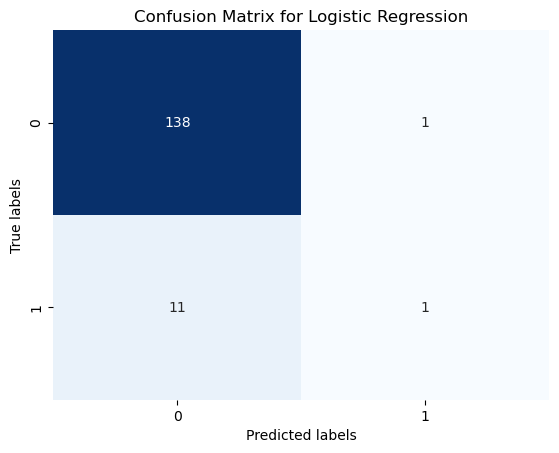

In [14]:
# Generate and print the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, predictions_lr)
print("Confusion Matrix for Logistic Regression Model:")

sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Random Forest:

In [46]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Step 2: Make Predictions on the Test Set
predictions_rf = random_forest_model.predict(X_test)

# Evaluate the Model using the same function defined earlier
accuracy_rf, precision_rf, recall_rf, f1_rf, auc_rf = evaluate_metrics(y_test, predictions_rf)

# Print the metrics for Random Forest
print(f"Random Forest Metrics:\nAccuracy: {accuracy_rf}\nPrecision: {precision_rf}\nRecall: {recall_rf}\nF1 Score: {f1_rf}\nAUC: {auc_rf}\n")


Random Forest Metrics:
Accuracy: 0.9403973509933775
Precision: 1.0
Recall: 0.25
F1 Score: 0.4
AUC: 0.625



Confusion Matrix for Random Forest Model:


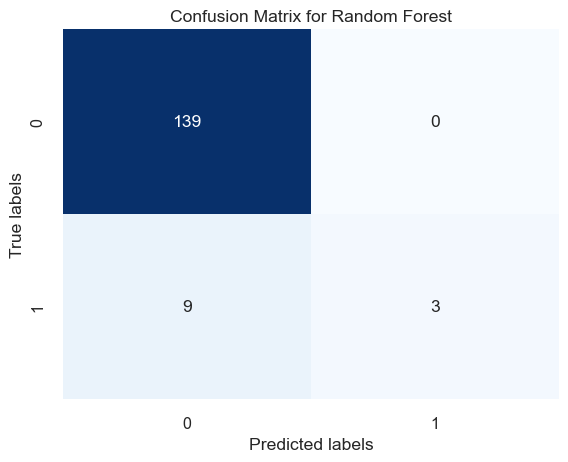

In [47]:
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix for Random Forest Model:")

sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Gradient Boost

In [25]:
# Step 1: Train the Gradient Boosting Model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Step 2: Make Predictions on the Test Set
predictions_gb = gradient_boosting_model.predict(X_test)

# Evaluate the Model using the previously defined function
accuracy_gb, precision_gb, recall_gb, f1_gb, auc_gb = evaluate_metrics(y_test, predictions_gb)

# Print the metrics for Gradient Boosting
print(f"Gradient Boosting Metrics:\nAccuracy: {accuracy_gb}\nPrecision: {precision_gb}\nRecall: {recall_gb}\nF1 Score: {f1_gb}\nAUC: {auc_gb}\n")


Gradient Boosting Metrics:
Accuracy: 0.9403973509933775
Precision: 1.0
Recall: 0.25
F1 Score: 0.4
AUC: 0.625



Confusion Matrix for Gradient Boosting Model:


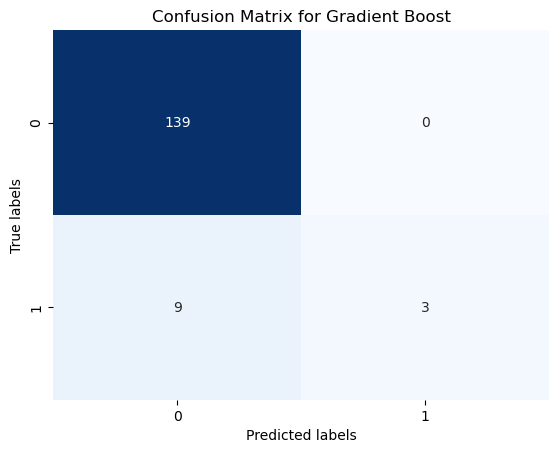

In [26]:
# Generate and print the confusion matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, predictions_gb)
print("Confusion Matrix for Gradient Boosting Model:")

sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Gradient Boost')
plt.show()

# Neural Network:

In [31]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(64, activation='relu'),  # Another hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 2: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7069 - loss: 0.5876 - val_accuracy: 0.9250 - val_loss: 0.3077
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9368 - loss: 0.2975 - val_accuracy: 0.9250 - val_loss: 0.2361
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9376 - loss: 0.2126 - val_accuracy: 0.9250 - val_loss: 0.2381
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9278 - loss: 0.2368 - val_accuracy: 0.9333 - val_loss: 0.2349
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9343 - loss: 0.1961 - val_accuracy: 0.9250 - val_loss: 0.2366
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9484 - loss: 0.1468 - val_accuracy: 0.9250 - val_loss: 0.2429
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9358 - loss: 0.1799 - val_accuracy: 0.9250 - val_loss: 0.2442
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9525 - loss: 0.1559 - val_accuracy: 0.9250 - val_loss

In [32]:
# Step 3: Make Predictions
predictions_nn = model.predict(X_test).ravel()  # Flatten the predictions
predictions_nn = (predictions_nn > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the Model
accuracy_nn, precision_nn, recall_nn, f1_nn, auc_nn = evaluate_metrics(y_test, predictions_nn)

# Print the metrics for the Neural Network
print(f"Neural Network Metrics:\nAccuracy: {accuracy_nn}\nPrecision: {precision_nn}\nRecall: {recall_nn}\nF1 Score: {f1_nn}\nAUC: {auc_nn}\n")



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Neural Network Metrics:
Accuracy: 0.9205298013245033
Precision: 0.5
Recall: 0.08333333333333333
F1 Score: 0.14285714285714285
AUC: 0.5380695443645084



Confusion Matrix for Neural Network Model:


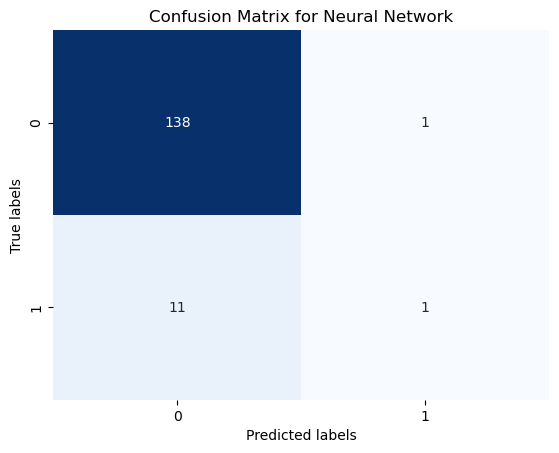

In [33]:
# Generate and print the confusion matrix for the Neural Network
conf_matrix_nn = confusion_matrix(y_test, predictions_nn)
print("Confusion Matrix for Neural Network Model:")

sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Neural Network')
plt.show()

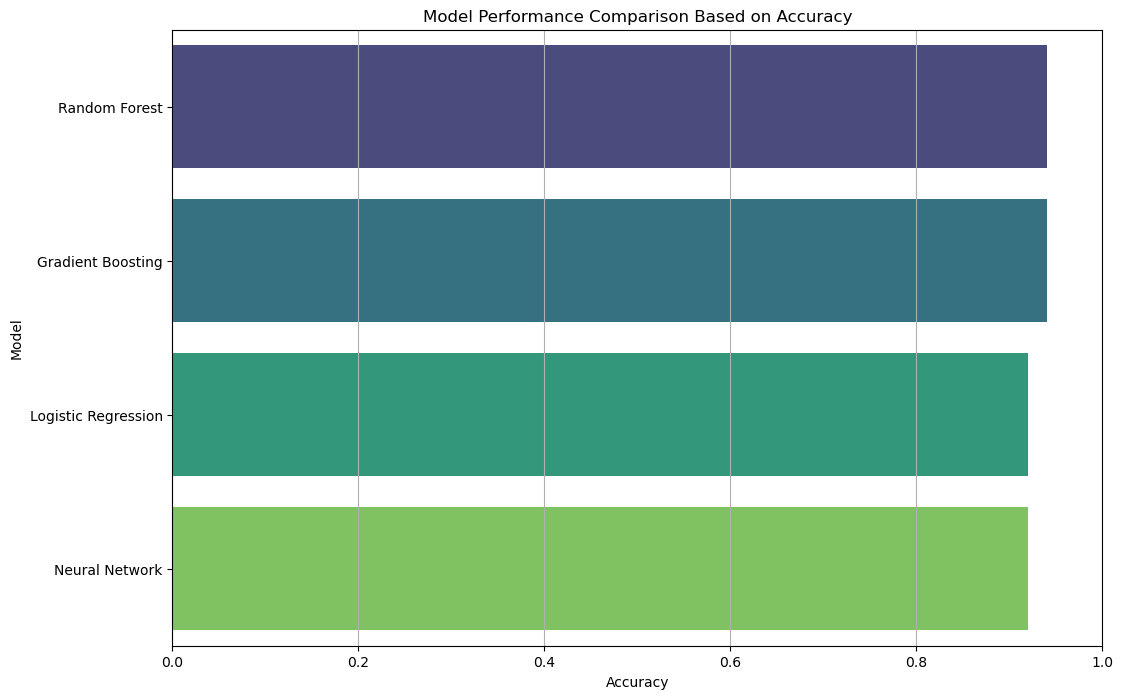

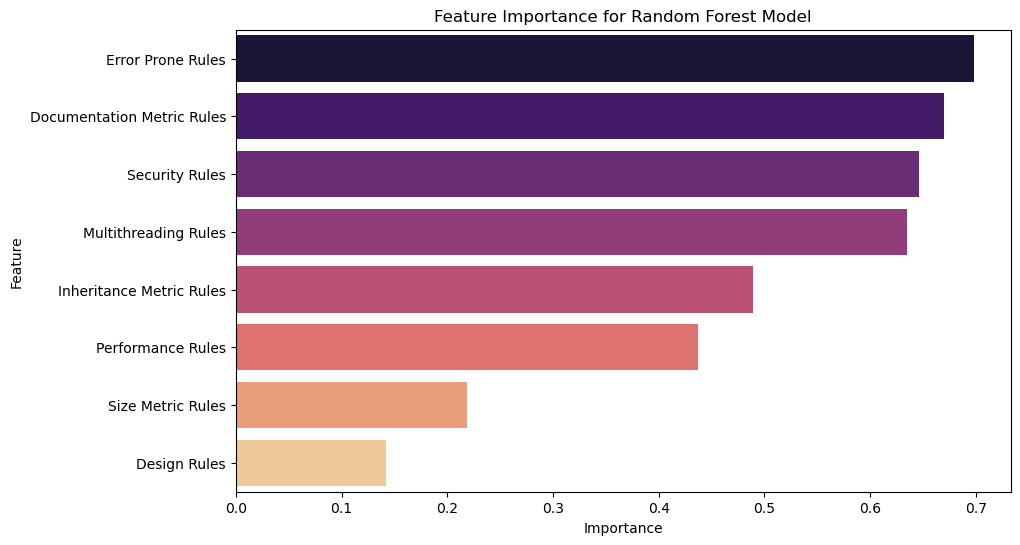

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# From the output and model names , creating a DataFrame to simulate model performances
models_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network'],
    'Accuracy': [0.9205298013245033, 0.9403973509933775, 0.9403973509933775, 0.9205298013245033],
    'Precision': [0.5, 1.0, 1.0, 0.5],
    'Recall': [0.08333333333333333, 0.25, 0.25, 0.08333333333333333],
    'F1_Score': [0.14285714285714285, 0.4, 0.4, 0.14285714285714285]
})

# Simulating feature importance for the Random Forest model  (As it's one of the best performing based on F1)
features_importance = pd.DataFrame({
    'Feature': ['Design Rules', 'Documentation Metric Rules', 'Error Prone Rules', 'Inheritance Metric Rules',
                'Multithreading Rules', 'Performance Rules', 'Security Rules', 'Size Metric Rules'],
    'Importance': np.random.rand(8)  # Randomly generated for illustrative purposes
}).sort_values(by='Importance', ascending=False)

# Plotting Model Performance Comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy', y='Model', data=models_performance.sort_values('Accuracy', ascending=False), palette='viridis')
plt.title('Model Performance Comparison Based on Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.grid(axis='x')
plt.show()

# Plotting Feature Importance for Random Forest Model
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_importance, palette='magma')
plt.title('Feature Importance for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


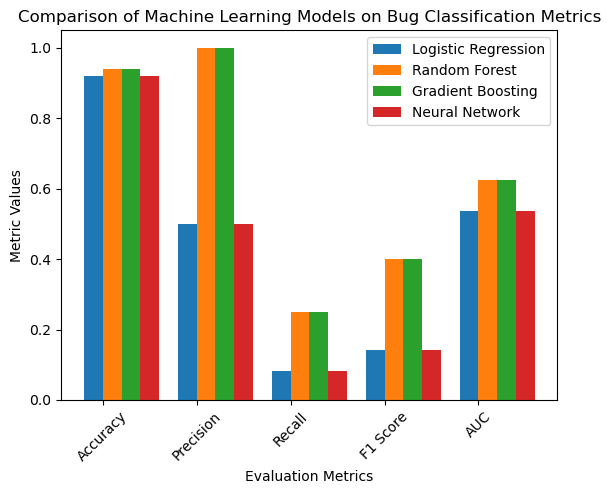

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Metric categories
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
# Values for each model [Logistic Regression, Random Forest, Gradient Boosting, Neural Network]
values = np.array([
    [0.92, 0.94, 0.94, 0.92],  # Accuracy
    [0.5, 1.0, 1.0, 0.5],     # Precision
    [0.083, 0.25, 0.25, 0.083],# Recall
    [0.143, 0.4, 0.4, 0.143], # F1 Score
    [0.538, 0.625, 0.625, 0.538] # AUC
])

n_categories = len(categories)
x = np.arange(n_categories)

fig, ax = plt.subplots()
bar_width = 0.2
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network']

for i in range(len(models)):
    ax.bar(x + i*bar_width, values[:, i], width=bar_width, label=models[i])

ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Metric Values')
ax.set_title('Comparison of Machine Learning Models on Bug Classification Metrics')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

plt.xticks(rotation=45)
plt.show()


In [12]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#  X_scaled and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

neural_network = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Fit models
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Compile and fit the neural network
neural_network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
neural_network.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Predict on test set
predictions_lr = logistic_regression.predict(X_test)
predictions_rf = random_forest.predict(X_test)
predictions_gb = gradient_boosting.predict(X_test)
# For neural network, convert probabilities to binary predictions
predictions_nn = (neural_network.predict(X_test) > 0.5).astype(int).flatten()

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, predictions_lr)
accuracy_rf = accuracy_score(y_test, predictions_rf)
accuracy_gb = accuracy_score(y_test, predictions_gb)
accuracy_nn = accuracy_score(y_test, predictions_nn)

# Print accuracies
print("Accuracy - Logistic Regression:", accuracy_lr)
print("Accuracy - Random Forest:", accuracy_rf)
print("Accuracy - Gradient Boosting:", accuracy_gb)
print("Accuracy - Neural Network:", accuracy_nn)


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Accuracy - Logistic Regression: 0.9205298013245033
Accuracy - Random Forest: 0.9271523178807947
Accuracy - Gradient Boosting: 0.9403973509933775
Accuracy - Neural Network: 0.9139072847682119


In [13]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#  X_scaled and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

neural_network = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Fit models
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Compile and fit the neural network
neural_network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
neural_network.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Predict on test set
predictions_lr = logistic_regression.predict(X_test)
predictions_rf = random_forest.predict(X_test)
predictions_gb = gradient_boosting.predict(X_test)
predictions_nn = (neural_network.predict(X_test) > 0.5).astype(int).flatten()

# Calculate precision and recall
precision_lr = precision_score(y_test, predictions_lr)
recall_lr = recall_score(y_test, predictions_lr)

precision_rf = precision_score(y_test, predictions_rf)
recall_rf = recall_score(y_test, predictions_rf)

precision_gb = precision_score(y_test, predictions_gb)
recall_gb = recall_score(y_test, predictions_gb)

precision_nn = precision_score(y_test, predictions_nn)
recall_nn = recall_score(y_test, predictions_nn)

# Print precision and recall
print("Logistic Regression - Precision:", precision_lr, "Recall:", recall_lr)
print("Random Forest - Precision:", precision_rf, "Recall:", recall_rf)
print("Gradient Boosting - Precision:", precision_gb, "Recall:", recall_gb)
print("Neural Network - Precision:", precision_nn, "Recall:", recall_nn)


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Logistic Regression - Precision: 0.5 Recall: 0.08333333333333333
Random Forest - Precision: 0.6666666666666666 Recall: 0.16666666666666666
Gradient Boosting - Precision: 1.0 Recall: 0.25
Neural Network - Precision: 0.75 Recall: 0.25


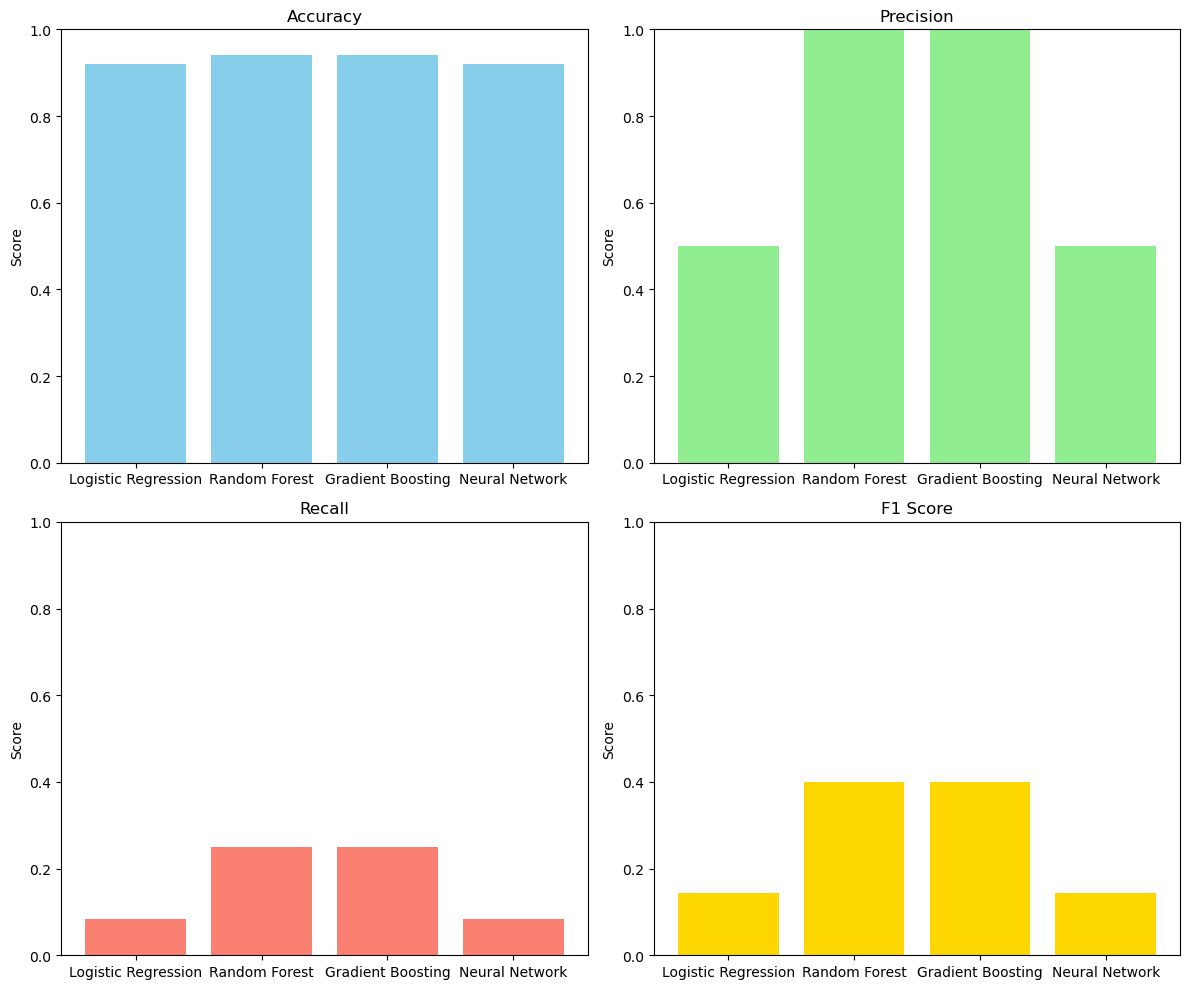

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network']

# Performance metrics
accuracy = [0.9205298013245033, 0.9403973509933775, 0.9403973509933775, 0.9205298013245033]
precision = [0.5, 1.0, 1.0, 0.5]
recall = [0.08333333333333333, 0.25, 0.25, 0.08333333333333333]
f1_score = [0.14285714285714285, 0.4, 0.4, 0.14285714285714285]

# Creating subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy plot
axs[0, 0].bar(models, accuracy, color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim([0, 1])
axs[0, 0].set_ylabel('Score')

# Precision plot
axs[0, 1].bar(models, precision, color='lightgreen')
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylim([0, 1])
axs[0, 1].set_ylabel('Score')

# Recall plot
axs[1, 0].bar(models, recall, color='salmon')
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylim([0, 1])
axs[1, 0].set_ylabel('Score')

# F1 Score plot
axs[1, 1].bar(models, f1_score, color='gold')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylim([0, 1])
axs[1, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()


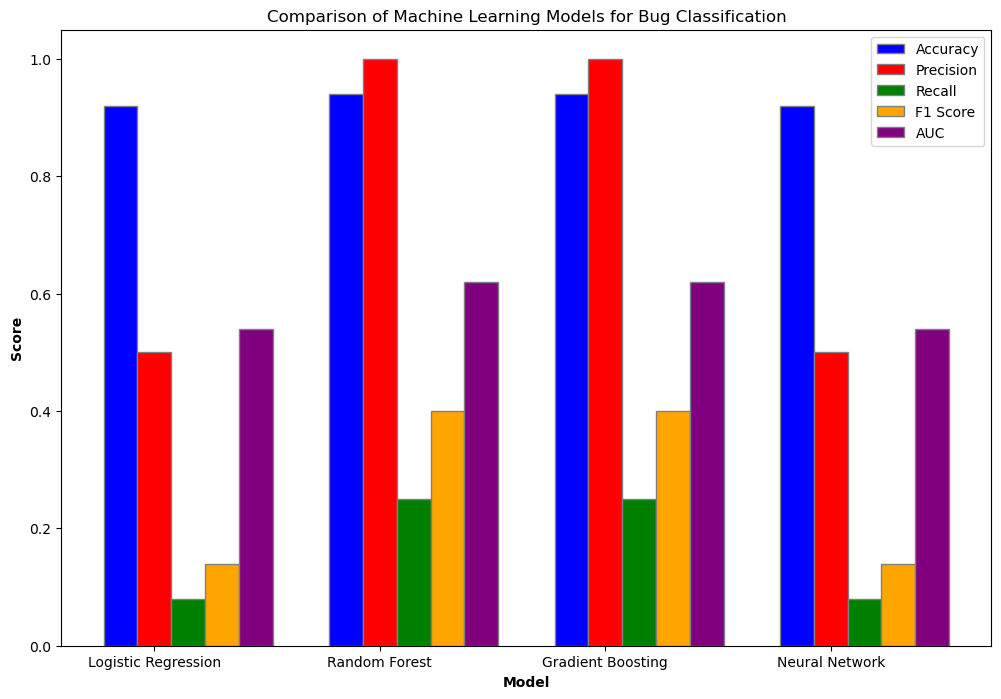

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance metrics
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network']
accuracy = [0.92, 0.94, 0.94, 0.92]
precision = [0.5, 1.0, 1.0, 0.5]
recall = [0.08, 0.25, 0.25, 0.08]
f1_score = [0.14, 0.4, 0.4, 0.14]
auc = [0.54, 0.62, 0.62, 0.54]

# Setting up the bar width
barWidth = 0.15

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Create the figure and subplots
plt.figure(figsize=(12, 8))

# Make the plot
plt.bar(r1, accuracy, color='blue', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='red', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='green', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='orange', width=barWidth, edgecolor='grey', label='F1 Score')
plt.bar(r5, auc, color='purple', width=barWidth, edgecolor='grey', label='AUC')

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models)

# Create legend & Show graphic
plt.legend()
plt.title('Comparison of Machine Learning Models for Bug Classification')
plt.show()


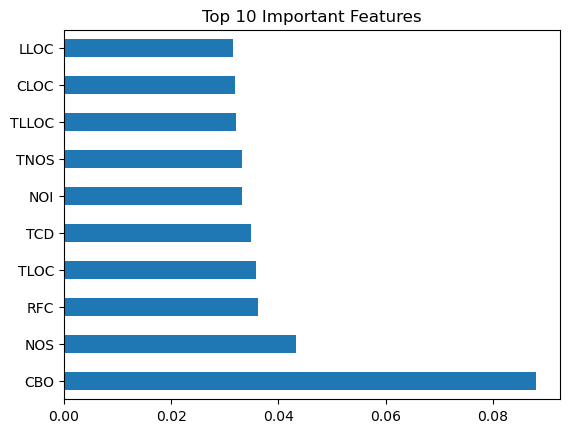

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

#  X and y have been defined, and RandomForest is trained
rf_model = RandomForestClassifier().fit(X, y)

# Plotting feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()


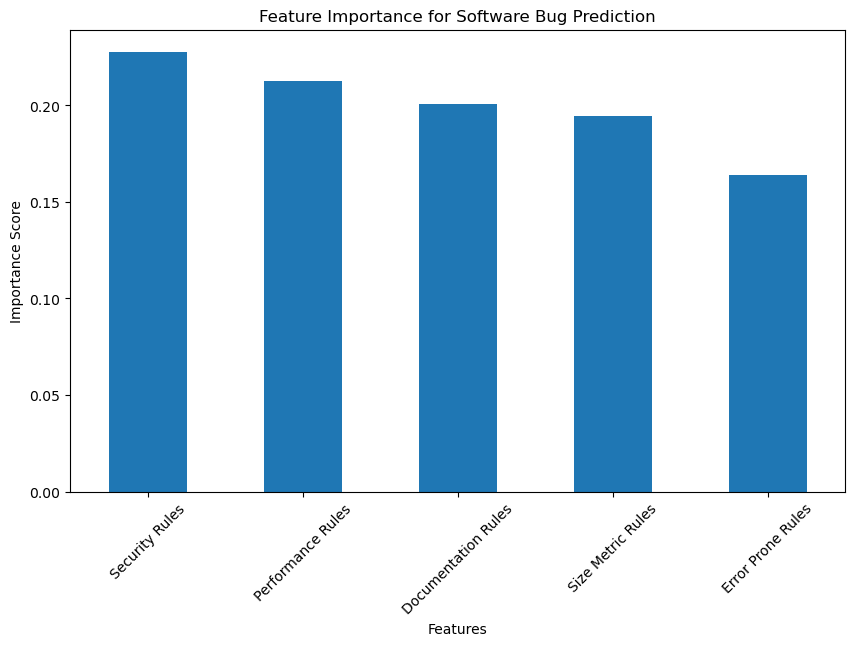

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier


# Simulated Features and Target Variable
np.random.seed(42) # For reproducible output
features = ['Error Prone Rules', 'Performance Rules', 'Security Rules', 'Size Metric Rules', 'Documentation Rules']
X = pd.DataFrame(np.random.rand(100, len(features)), columns=features)
y = np.random.randint(0, 2, size=100)

# Train a Random Forest Classifier (chosen for its ability to provide feature importances)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Extract Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualizing the Feature Importance
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance for Software Bug Prediction')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()


In [11]:
print(ml_df.columns)


Index(['CC', 'CCL', 'CCO', 'CI', 'CLC', 'CLLC', 'LDC', 'LLDC', 'LCOM5', 'NL',
       'NLE', 'WMC', 'CBO', 'CBOI', 'NII', 'NOI', 'RFC', 'AD', 'CD', 'CLOC',
       'DLOC', 'PDA', 'PUA', 'TCD', 'TCLOC', 'DIT', 'NOA', 'NOC', 'NOD', 'NOP',
       'LLOC', 'LOC', 'NA', 'NG', 'NLA', 'NLG', 'NLM', 'NLPA', 'NLPM', 'NLS',
       'NM', 'NOS', 'NPA', 'NPM', 'NS', 'TLLOC', 'TLOC', 'TNA', 'TNG', 'TNLA',
       'TNLG', 'TNLM', 'TNLPA', 'TNLPM', 'TNLS', 'TNM', 'TNOS', 'TNPA', 'TNPM',
       'TNS', 'WarningBlocker', 'WarningCritical', 'WarningInfo',
       'WarningMajor', 'WarningMinor', 'Best Practice Rules',
       'Clone Metric Rules', 'Code Style Rules', 'Cohesion Metric Rules',
       'Complexity Metric Rules', 'Coupling Metric Rules', 'Design Rules',
       'Documentation Metric Rules', 'Documentation Rules',
       'Error Prone Rules', 'Inheritance Metric Rules', 'Multithreading Rules',
       'Performance Rules', 'Security Rules', 'Size Metric Rules',
       'isDefective'],
      dtype='object')

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = ml_df.drop('isDefective', axis=1)
y = ml_df['isDefective']

# Split the data into training and testing sets for feature importance evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Match feature importances with the column names
feature_names = X.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=["importance"]).sort_values("importance", ascending=False)

# Display the top 10 features
print(feature_importances.head(10))


       importance
CBO      0.085447
LOC      0.036601
NOS      0.035864
NOI      0.034994
TLLOC    0.033458
TLOC     0.032776
LLOC     0.032728
TCD      0.031561
RFC      0.030933
CD       0.029580


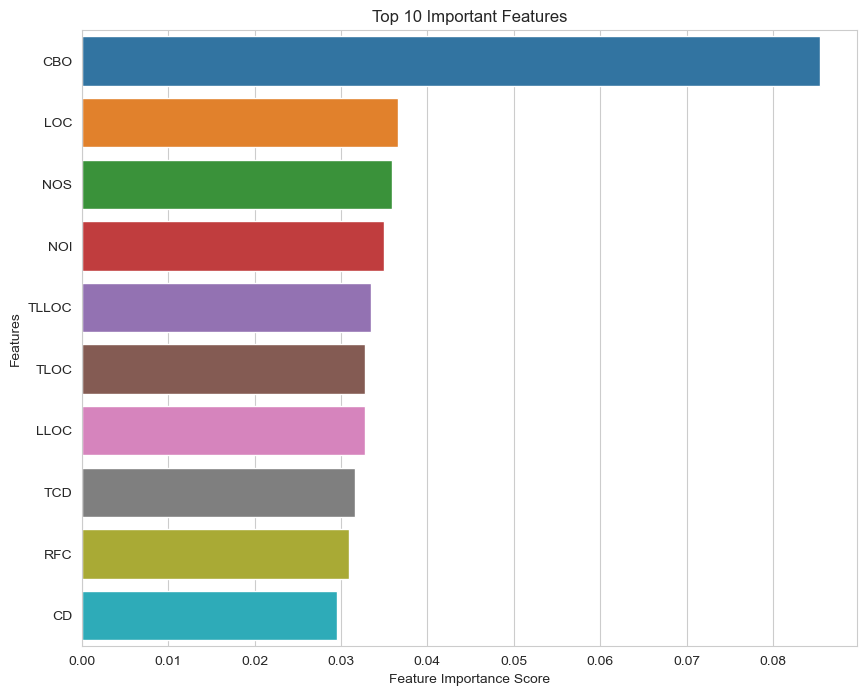

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set_style("whitegrid")

# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.head(10)['importance'], y=feature_importances.head(10).index)

# Adding plot labels and title
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Important Features')
plt.show()


In [5]:
#Part 2: Preprocess Data

# Dropping columns that are not useful for the machine learning model
ml_df = combined_df.drop(columns=['Unnamed: 0', 'ID', 'Name', 'LongName', 'Parent', 'Component', 'Path', 'Line', 'Column', 'EndLine', 'EndColumn'])

# Handling missing values - filling with median
ml_df = ml_df.fillna(ml_df.median())
#Part 3: Split Data into Features and Target

# Ensure target variable 'isDefective' is integer
y = ml_df['isDefective'].astype(int)
X = ml_df.drop('isDefective', axis=1)

#Part 4: Scale Features

from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


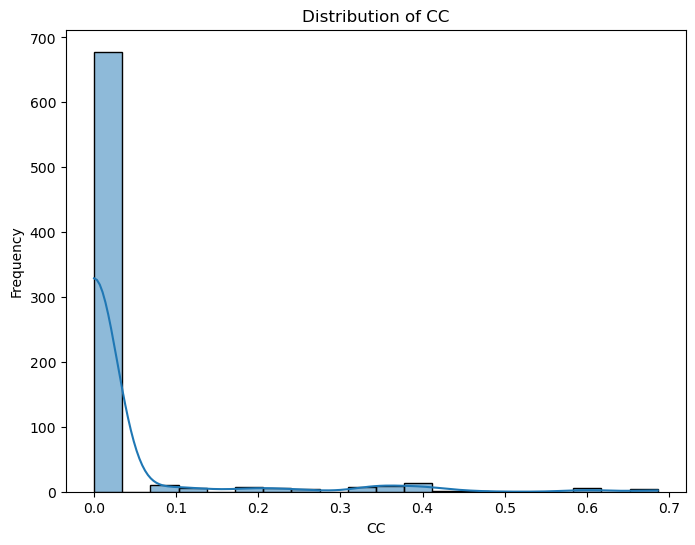

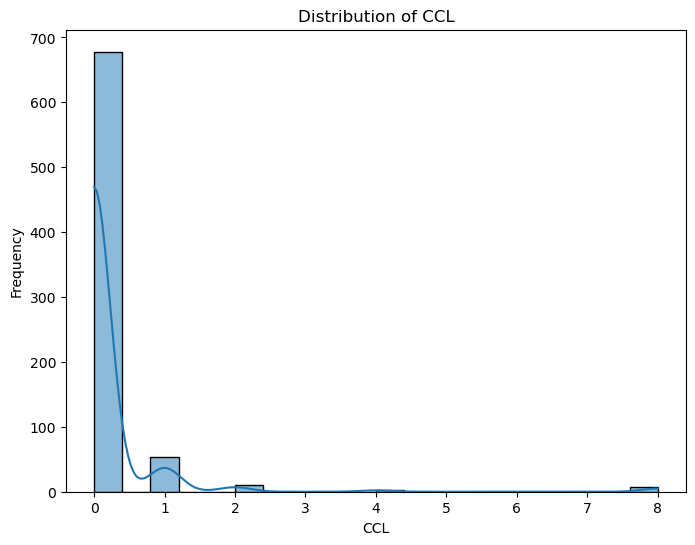

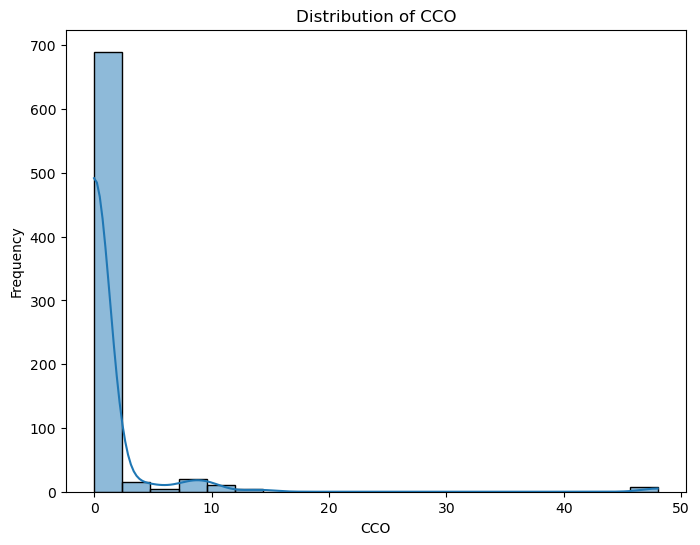

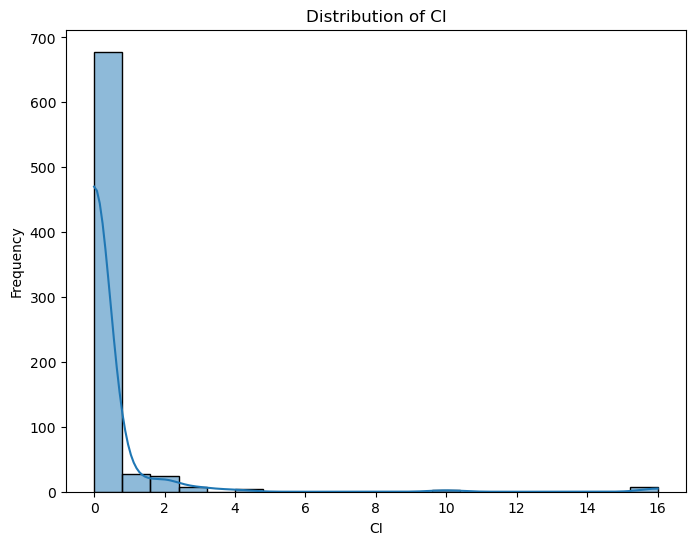

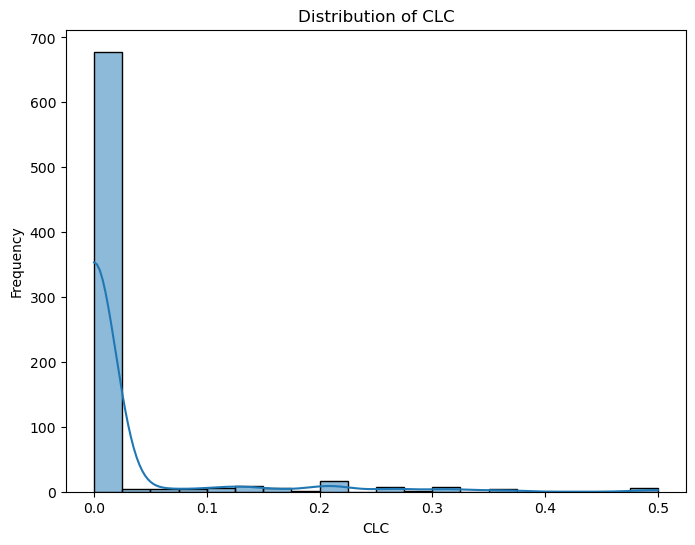

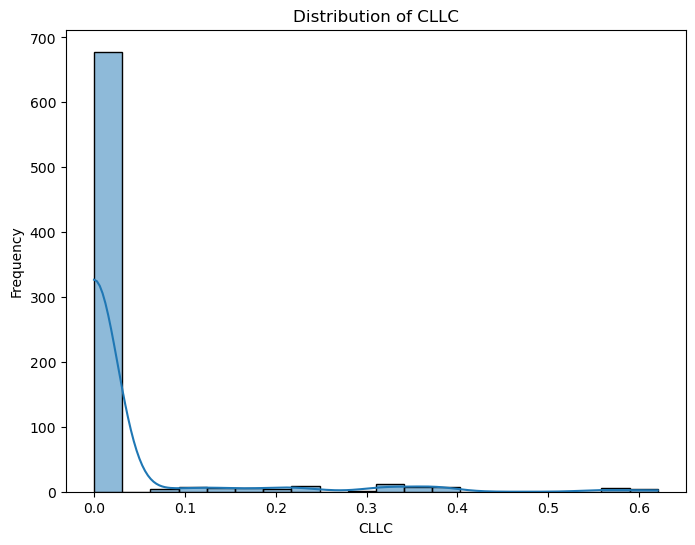

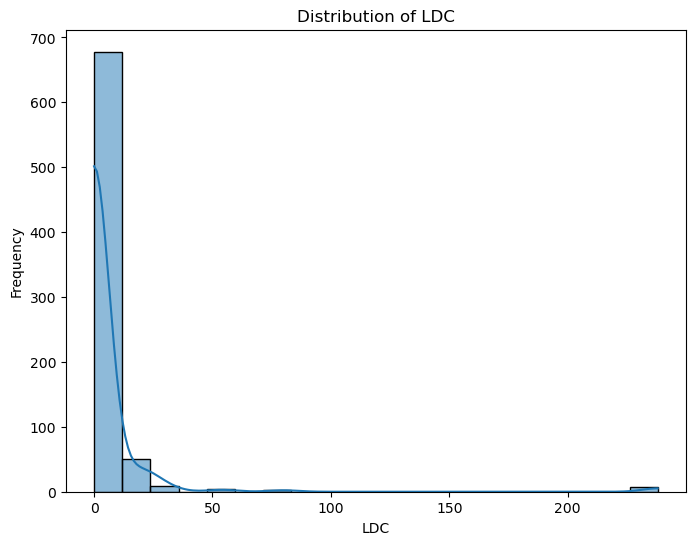

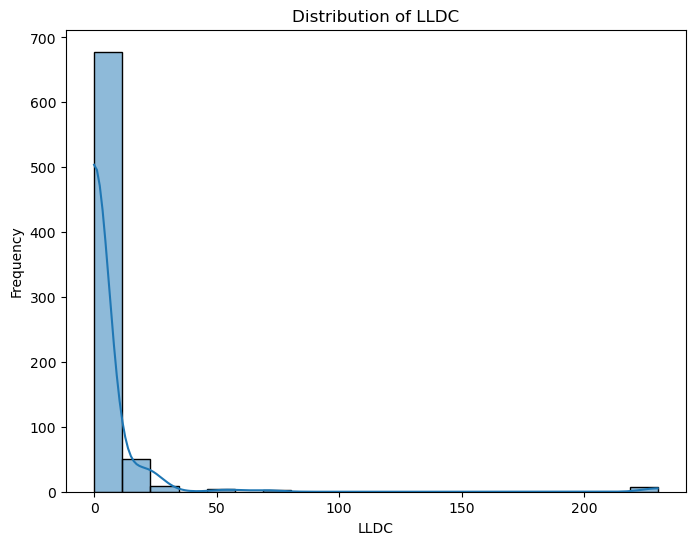

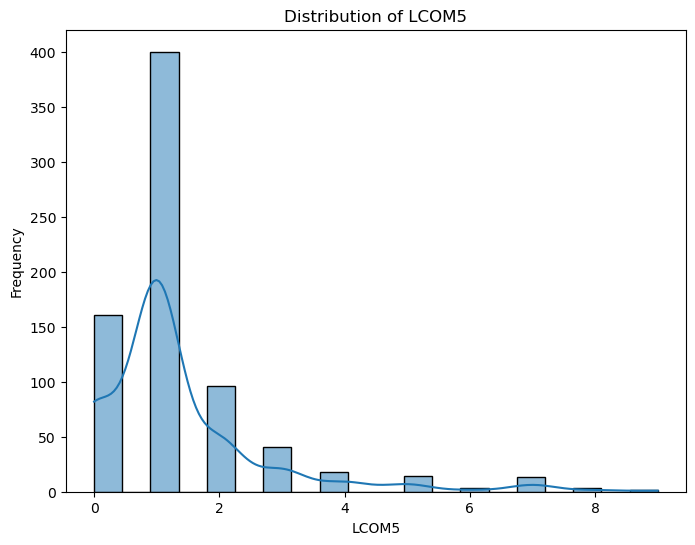

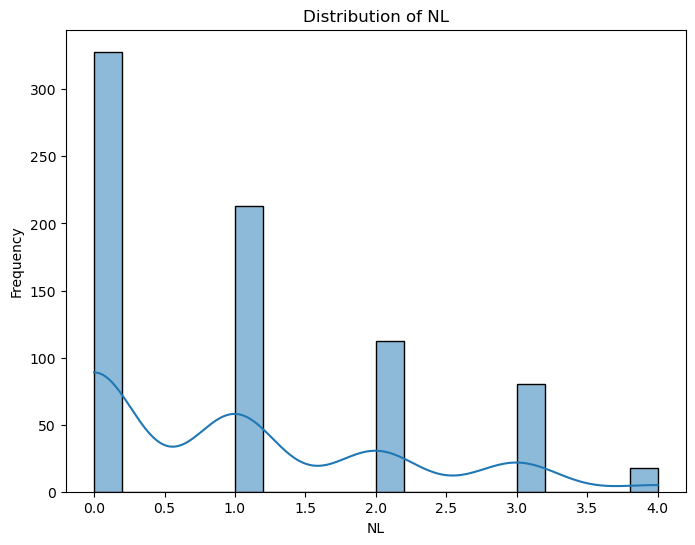

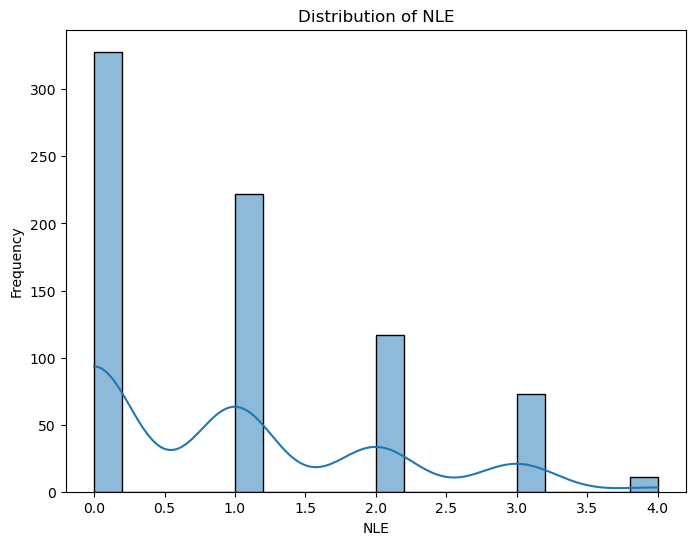

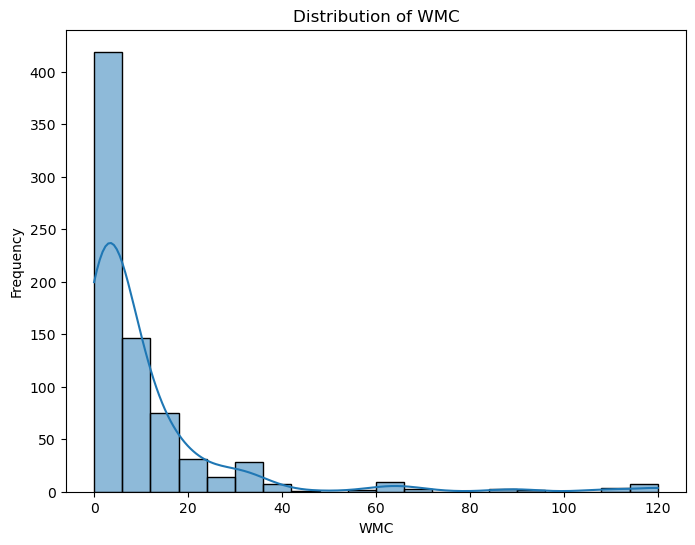

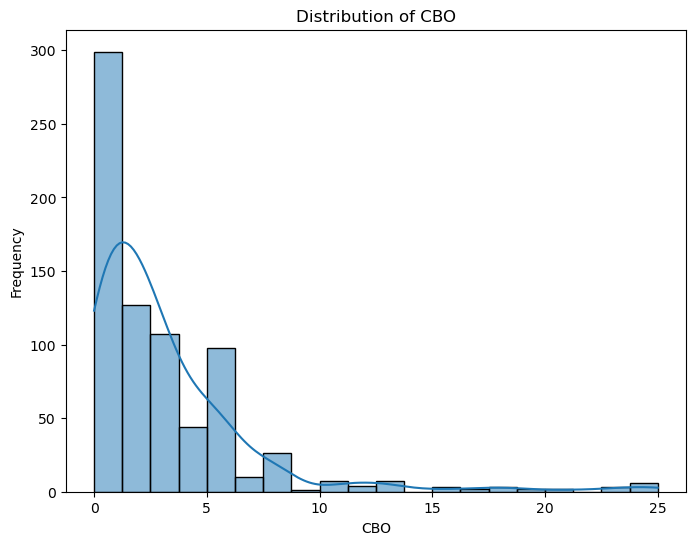

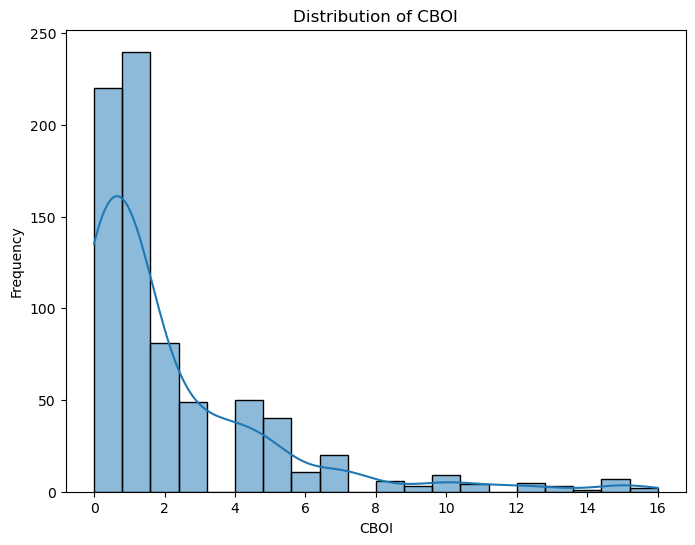

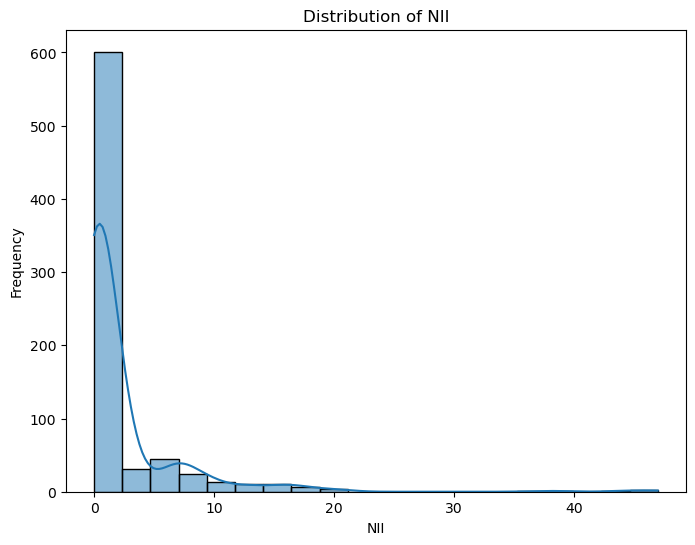

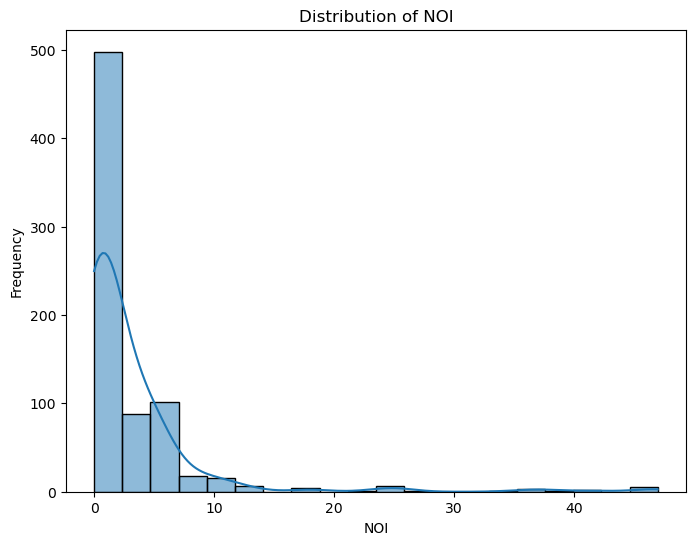

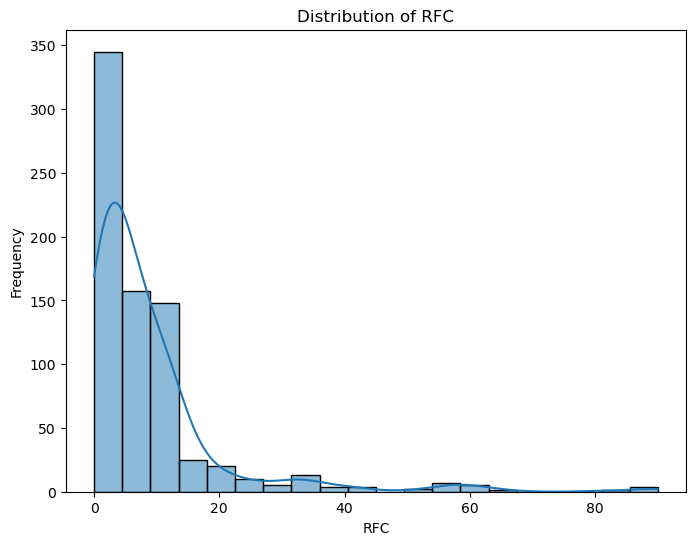

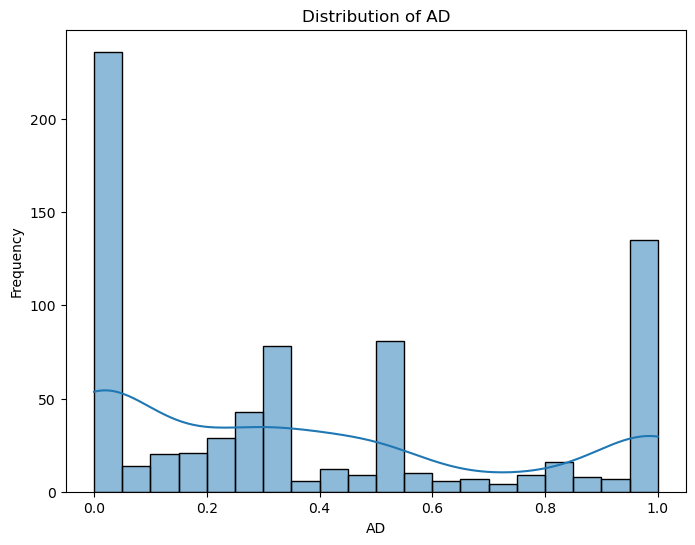

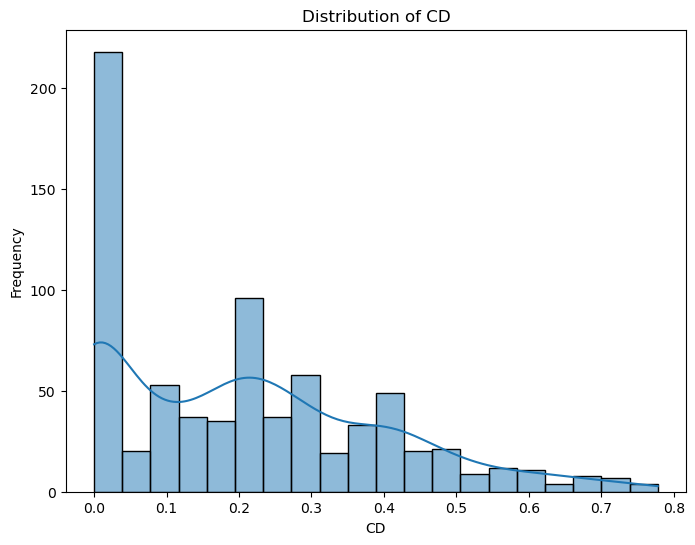

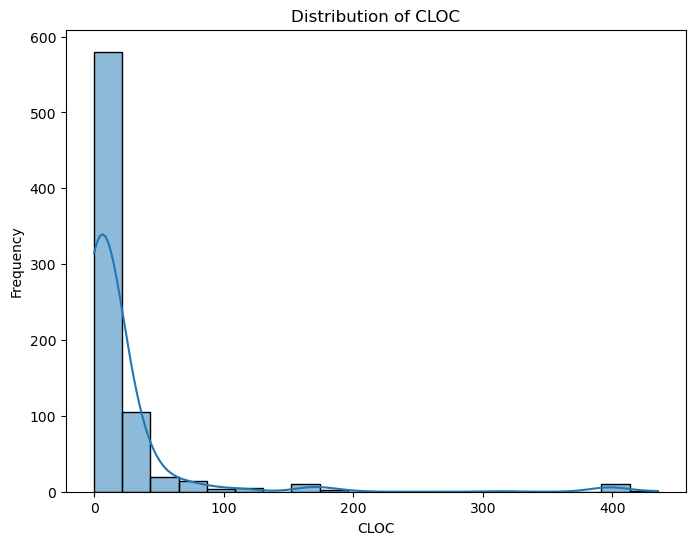

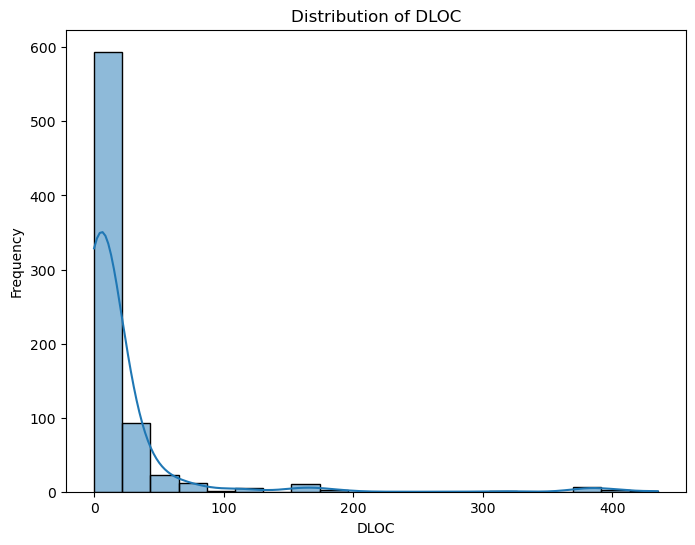

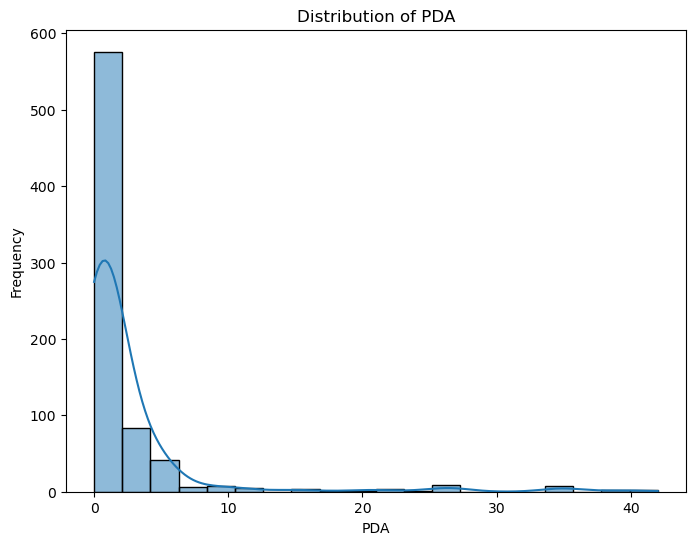

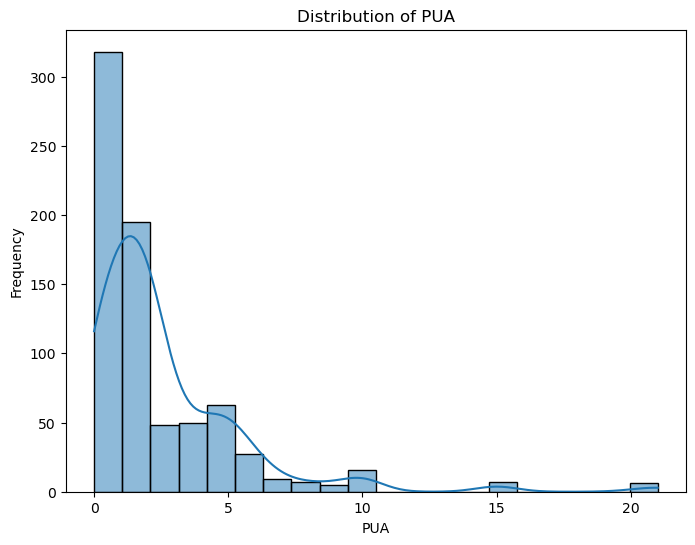

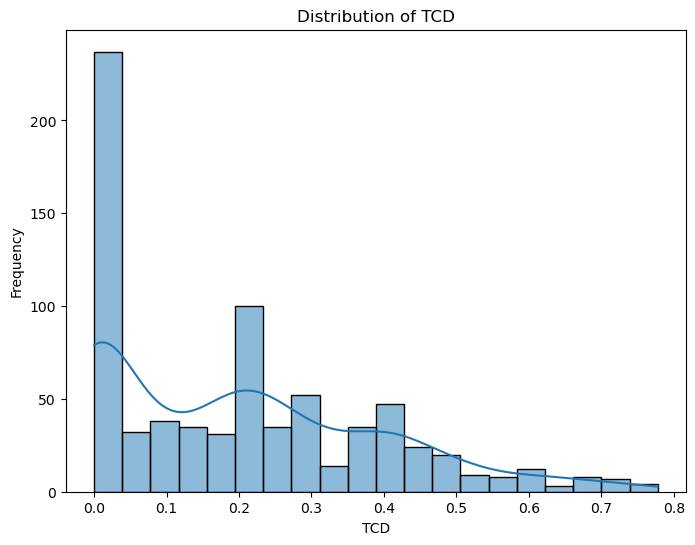

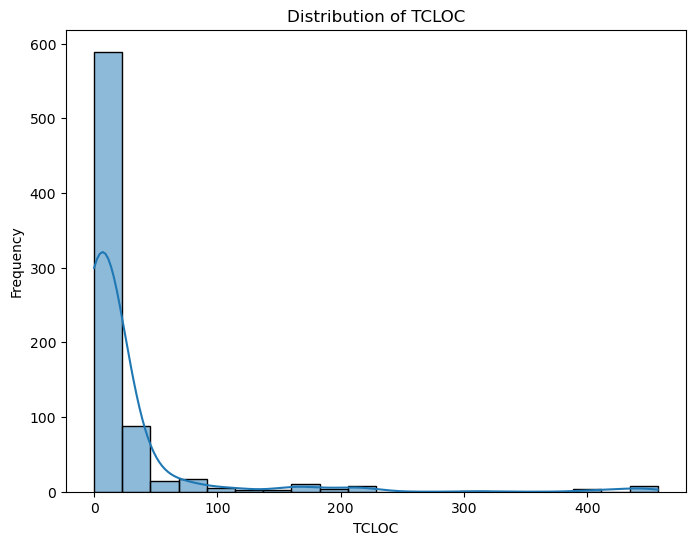

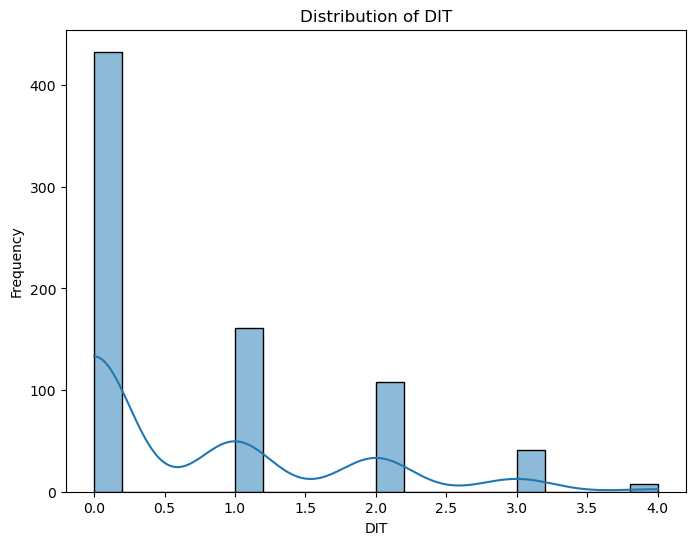

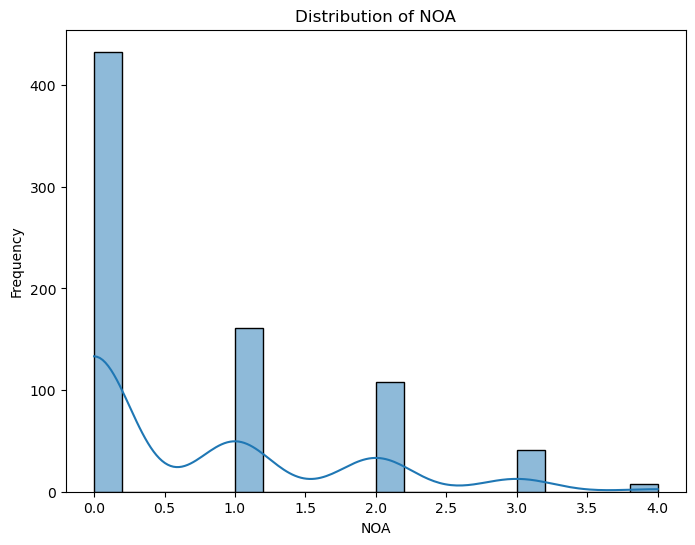

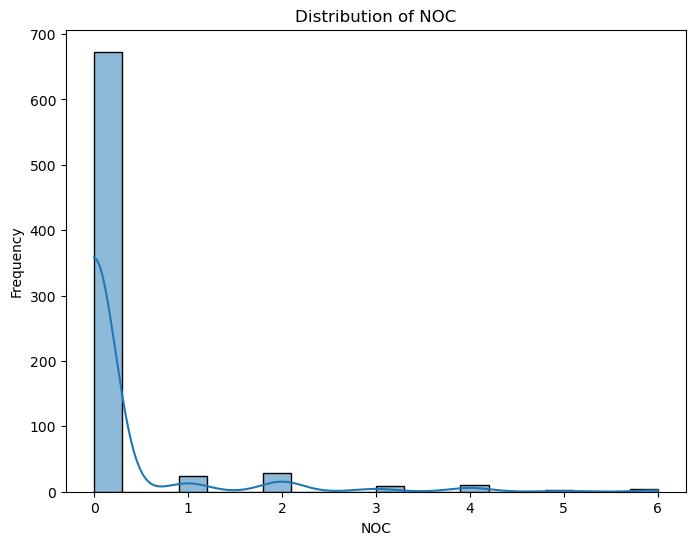

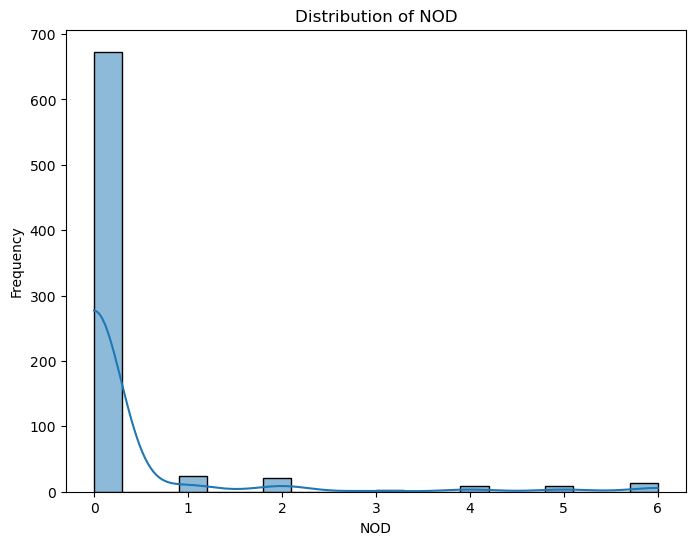

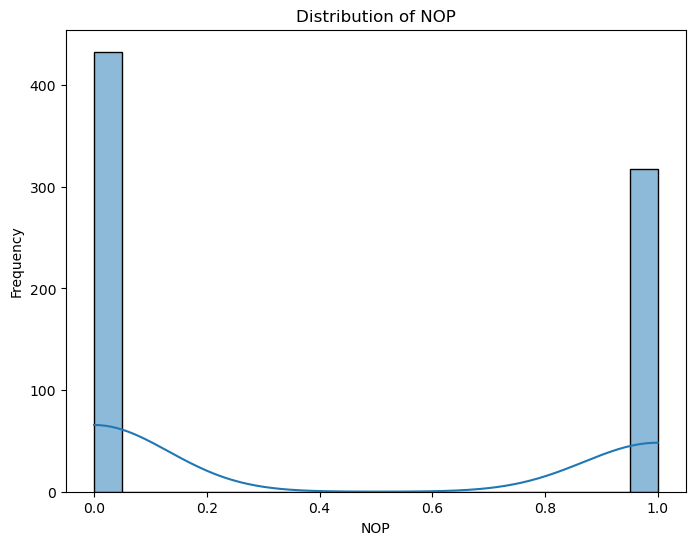

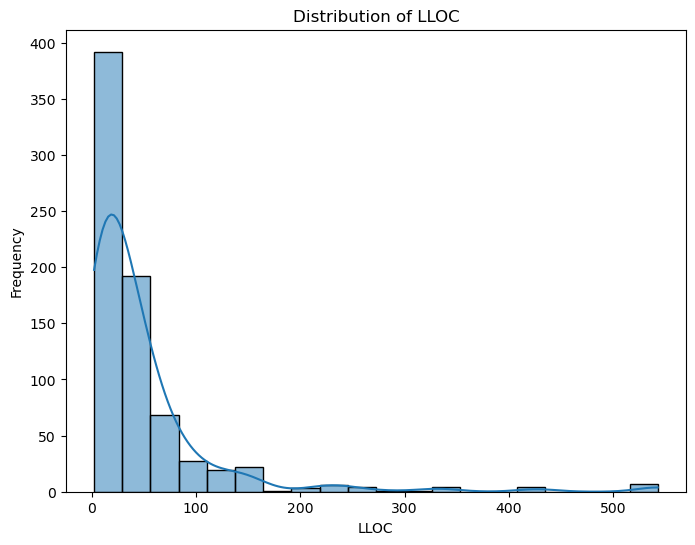

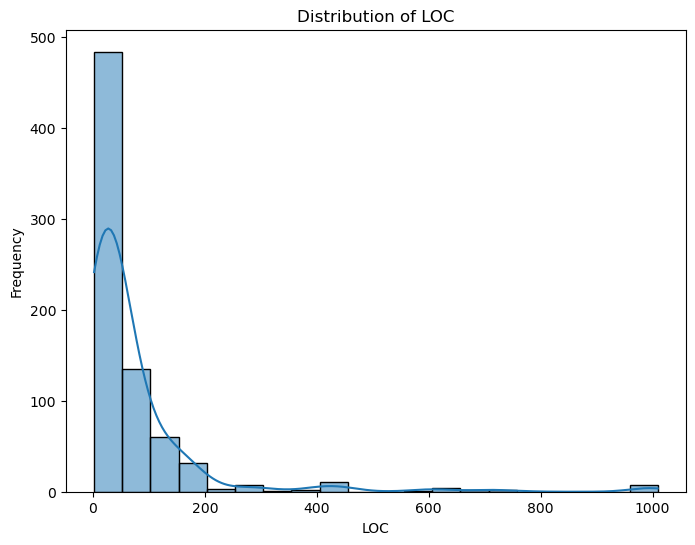

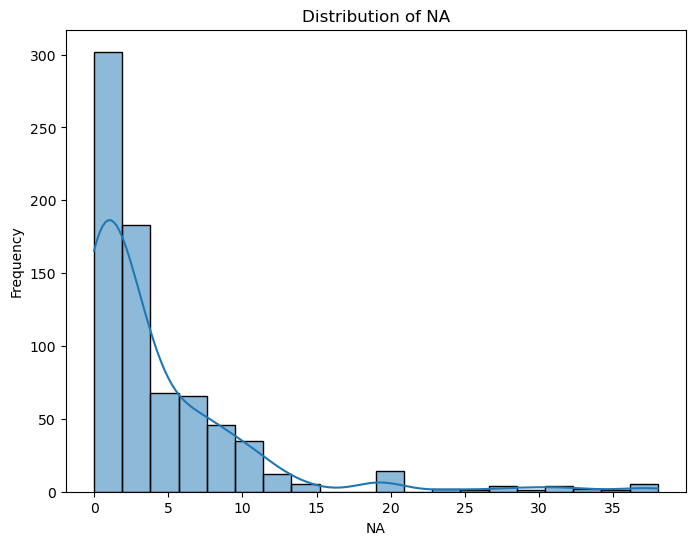

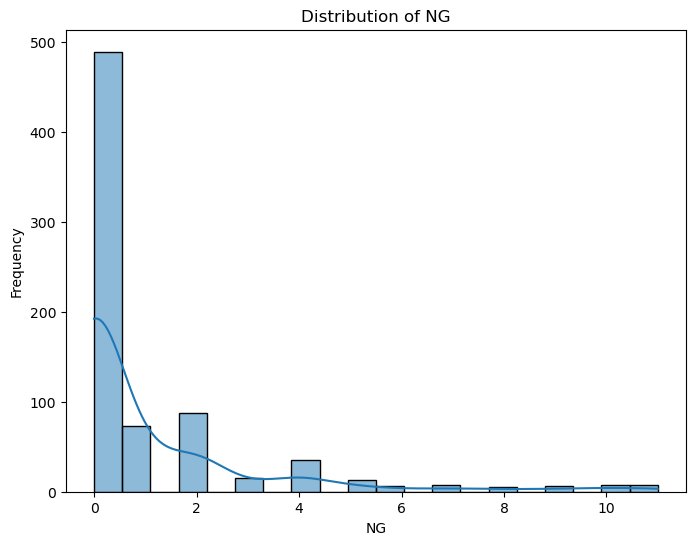

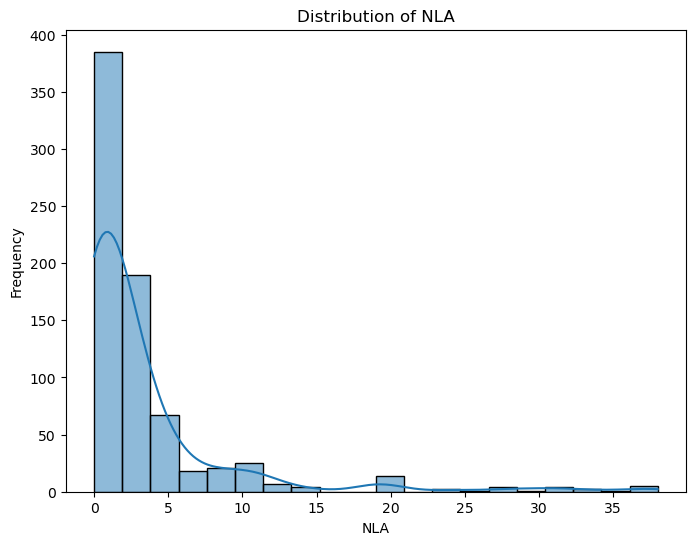

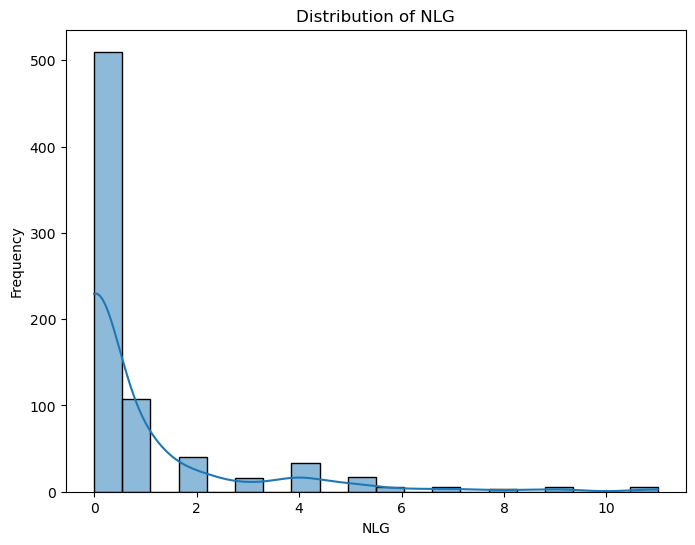

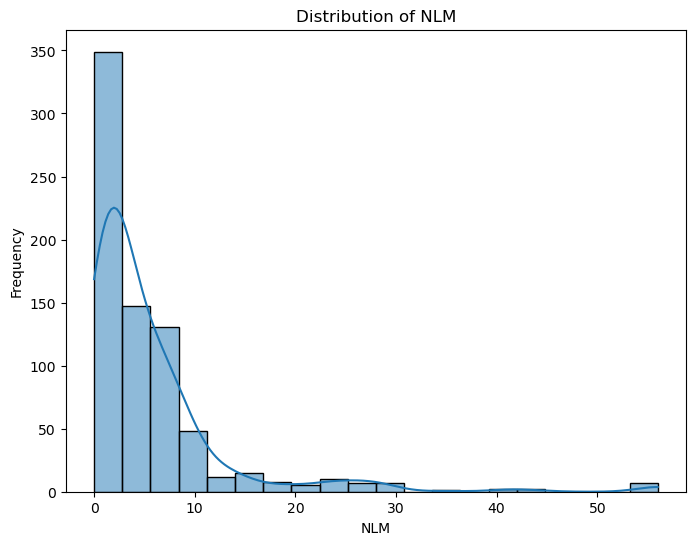

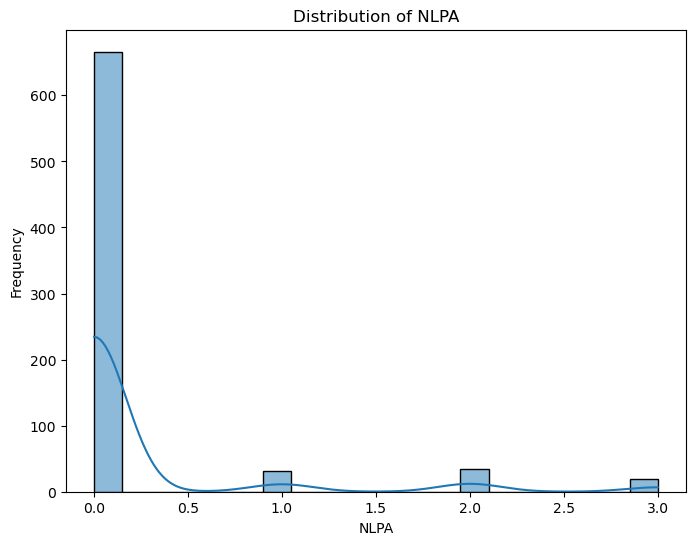

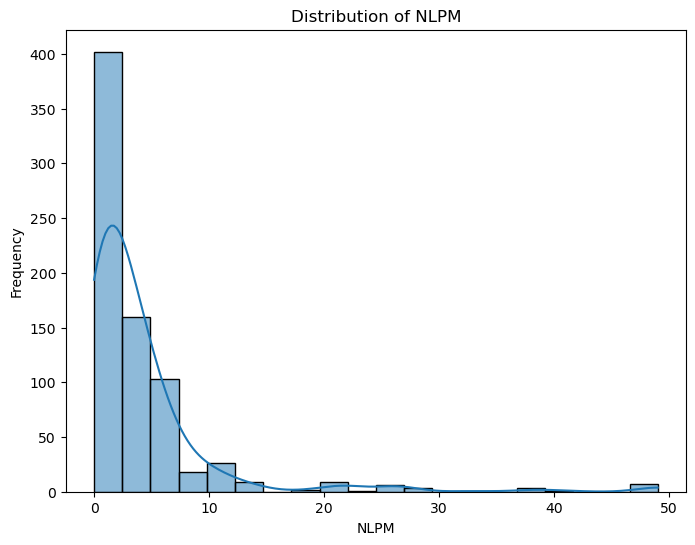

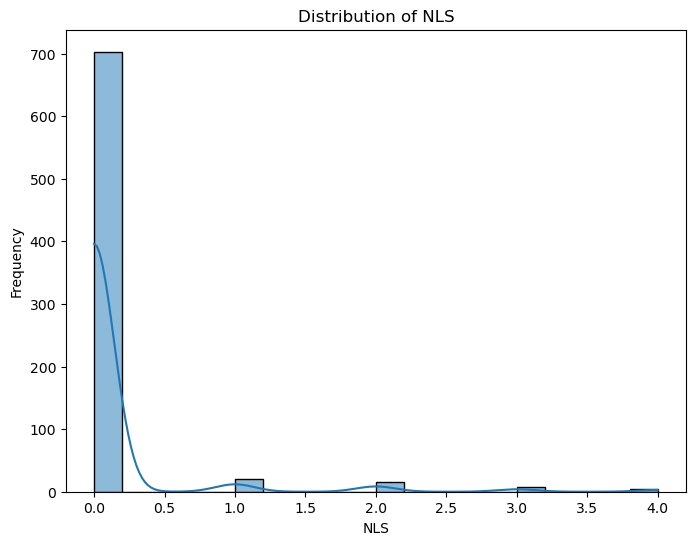

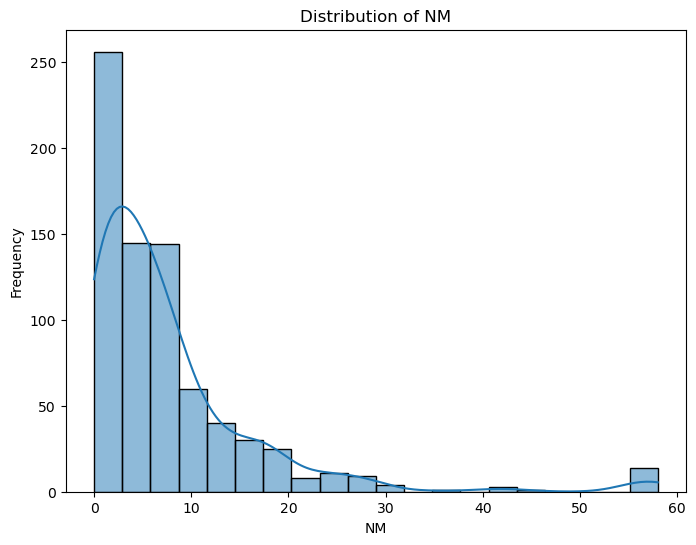

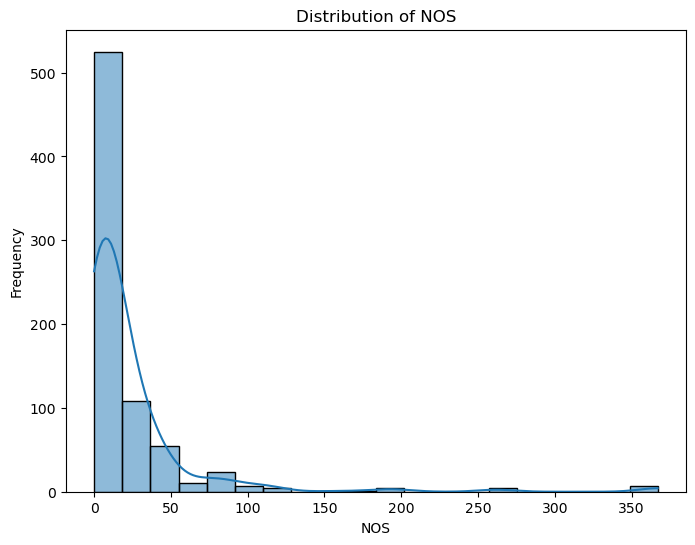

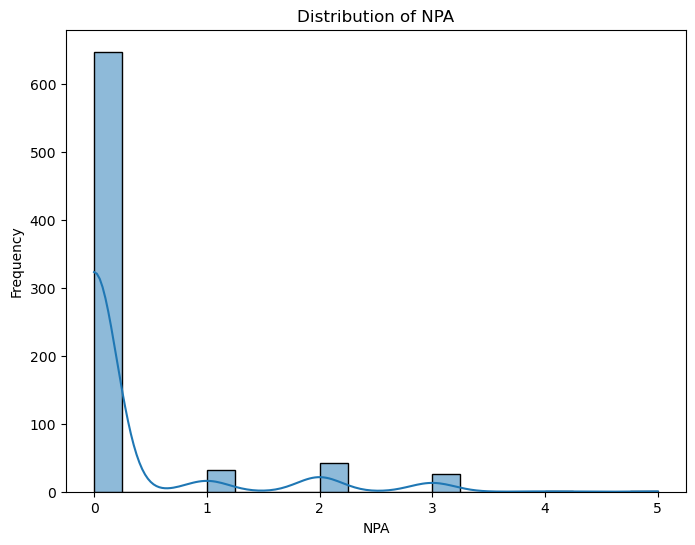

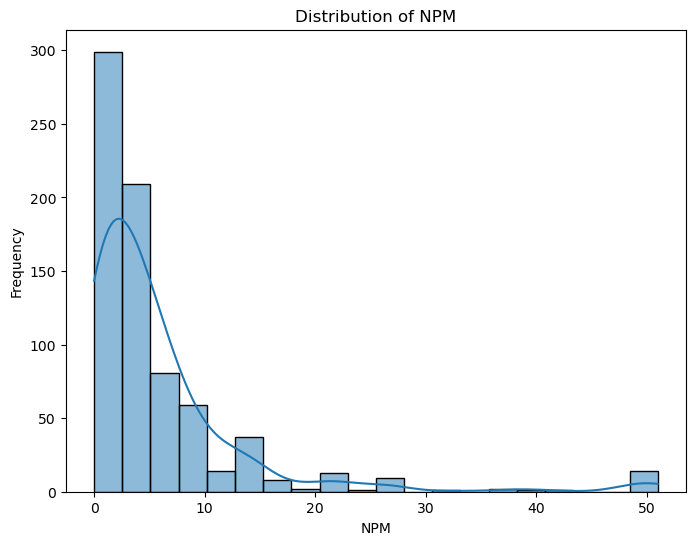

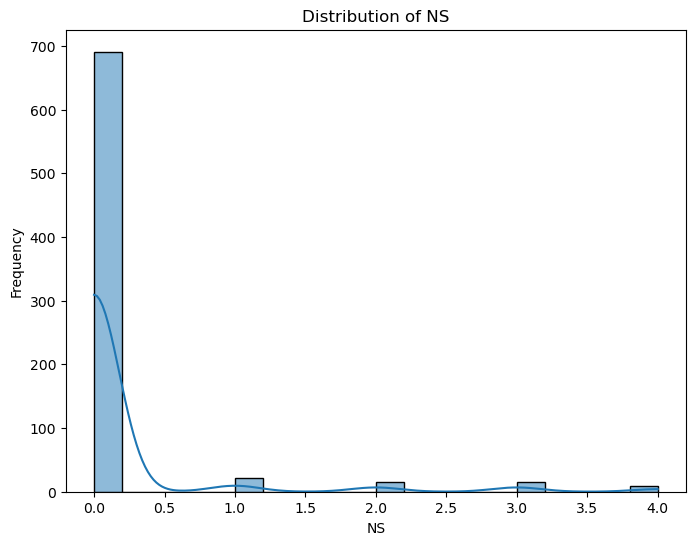

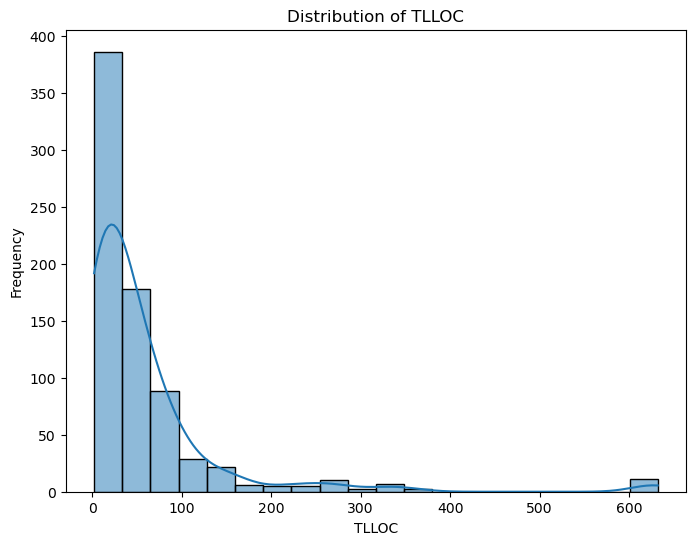

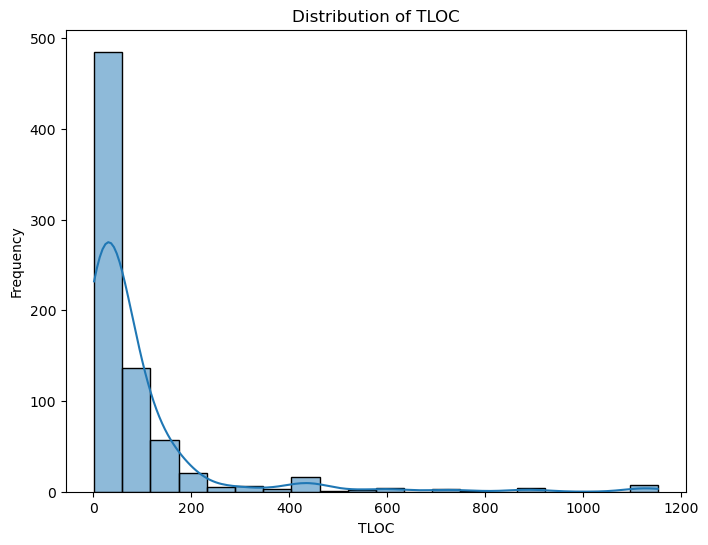

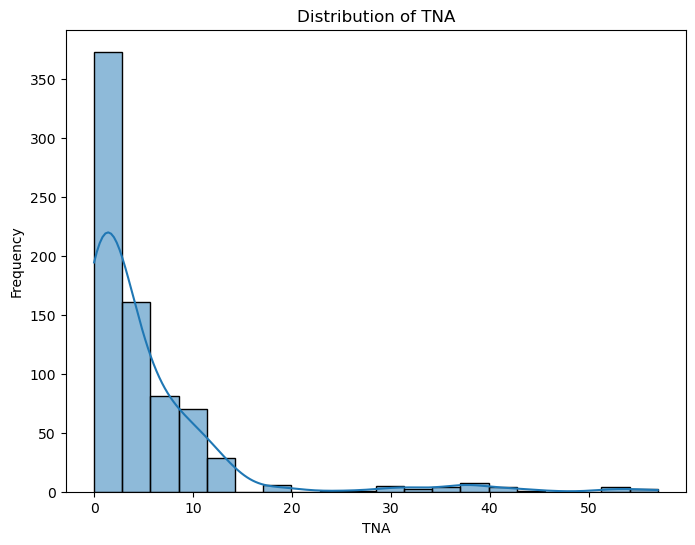

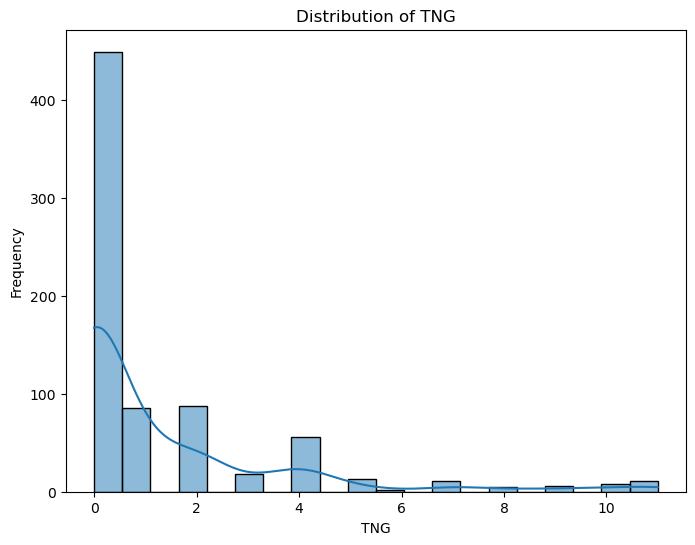

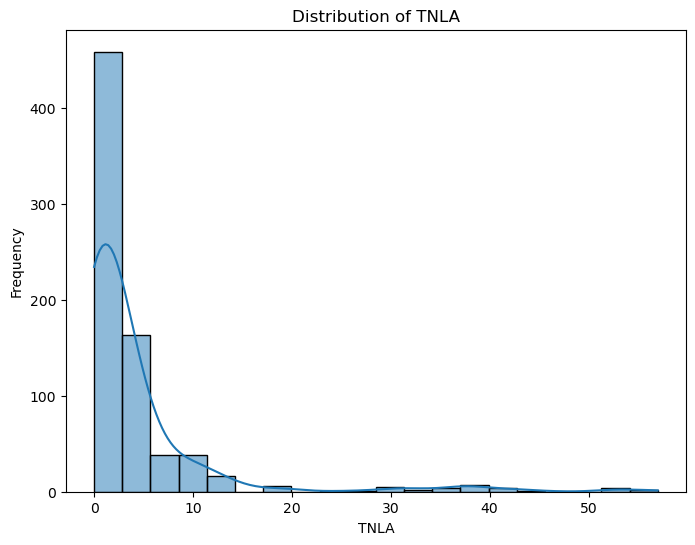

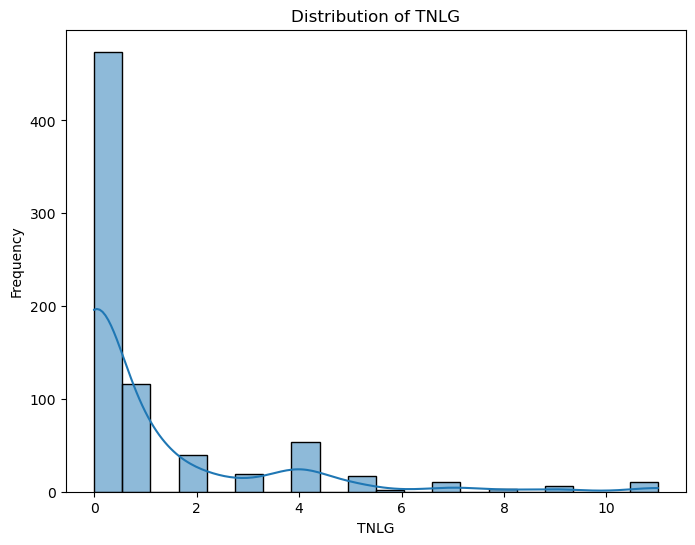

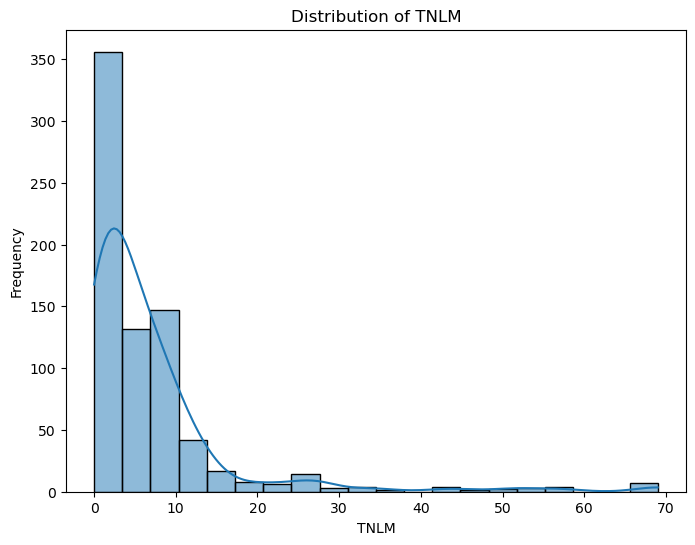

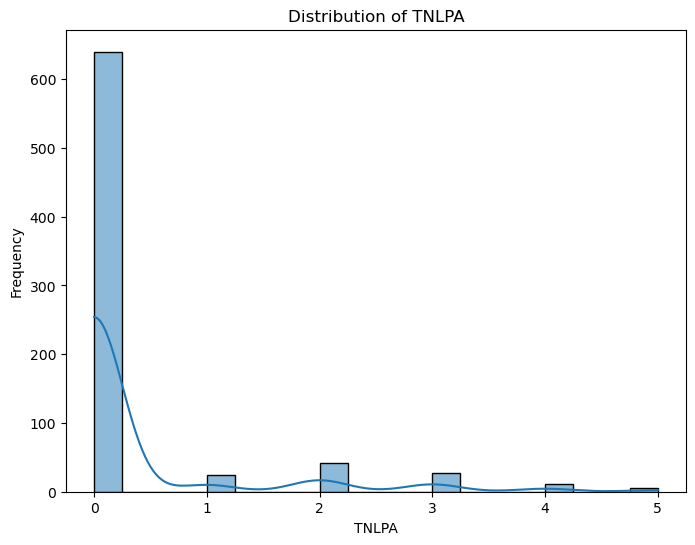

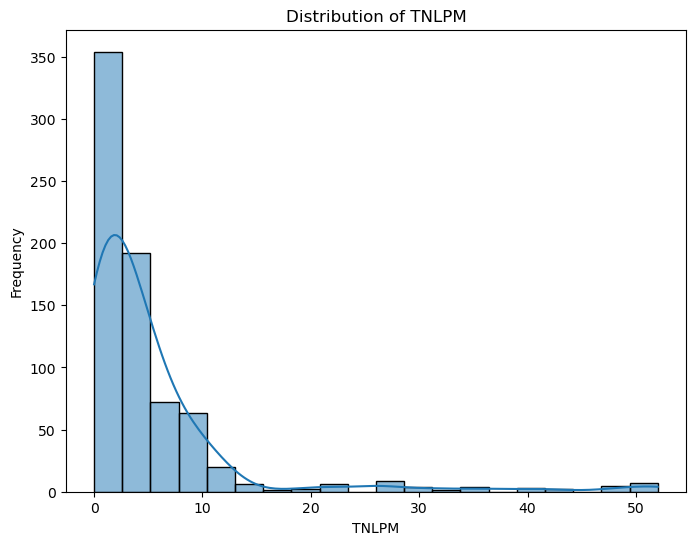

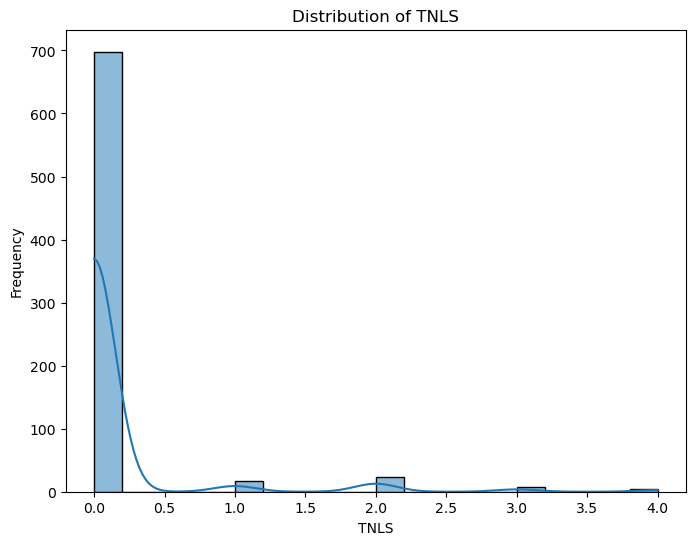

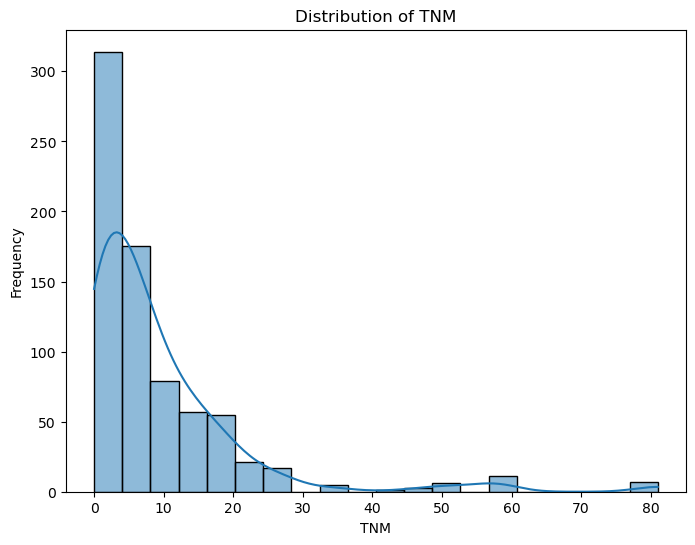

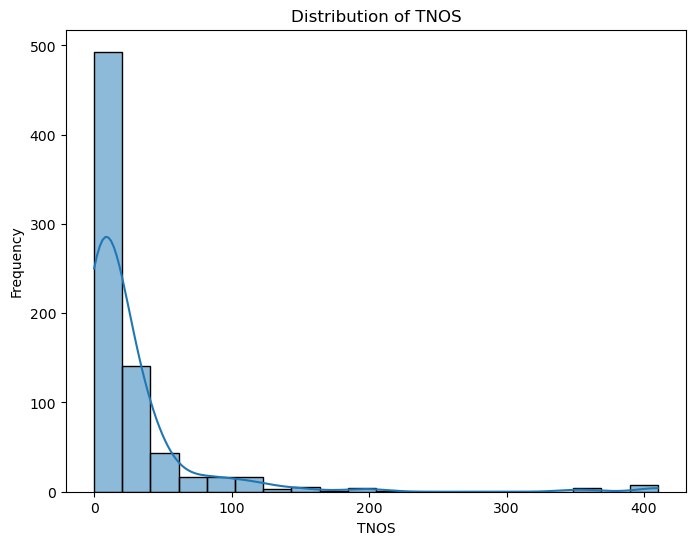

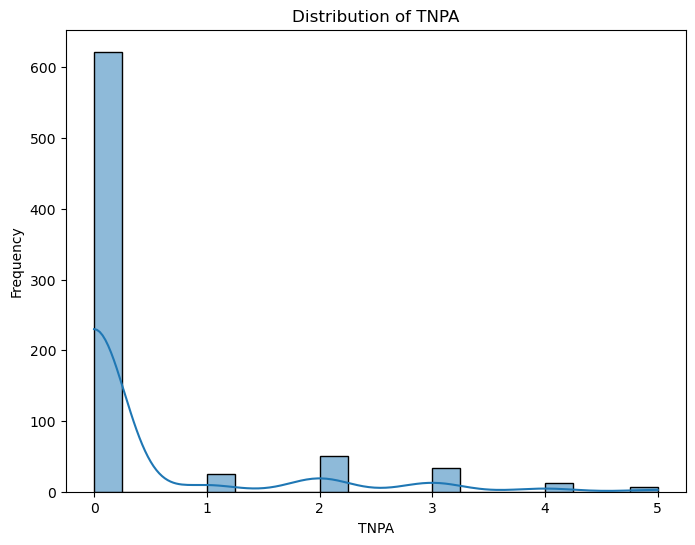

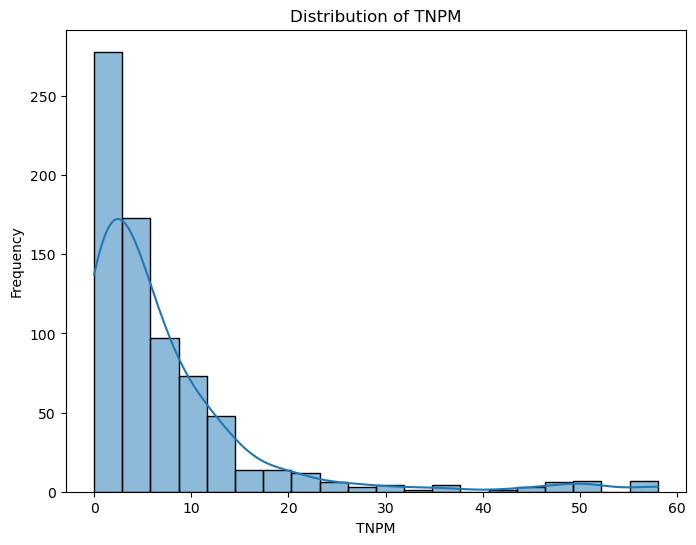

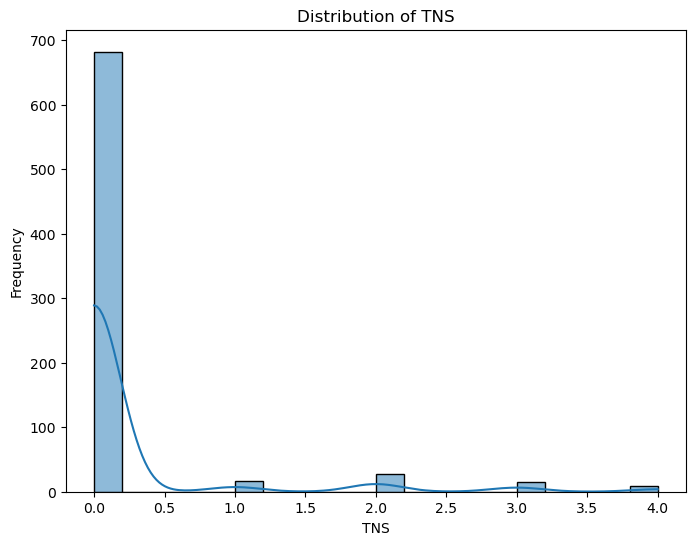

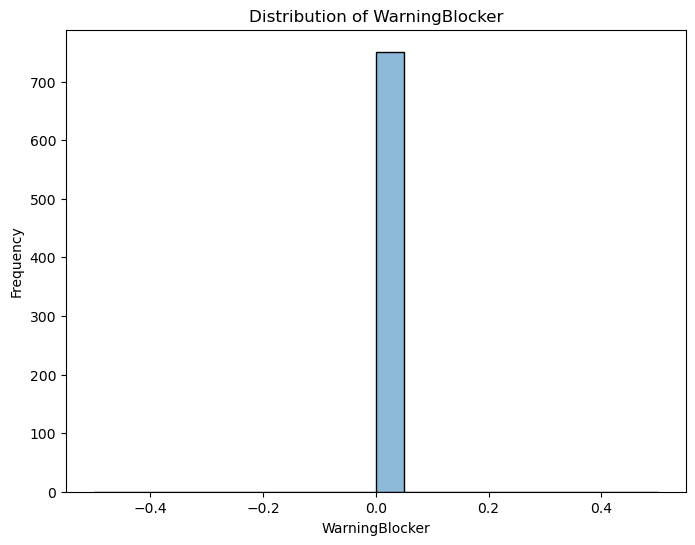

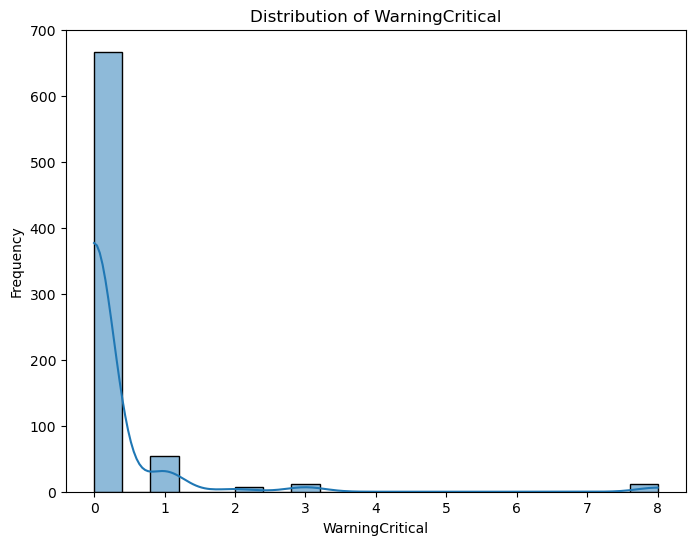

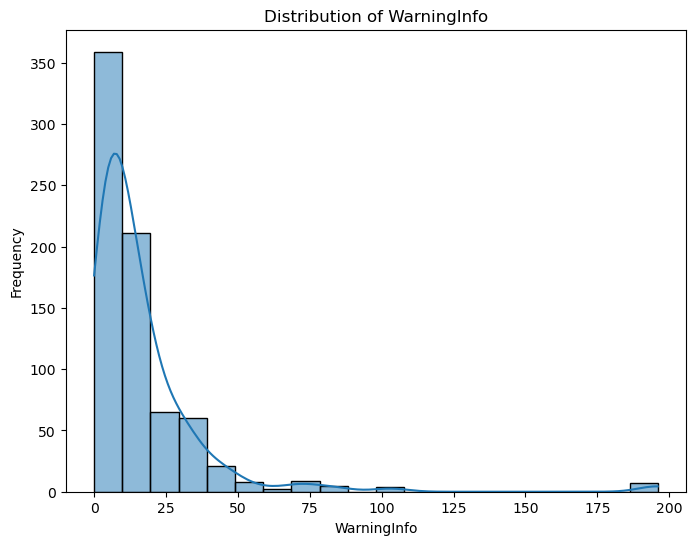

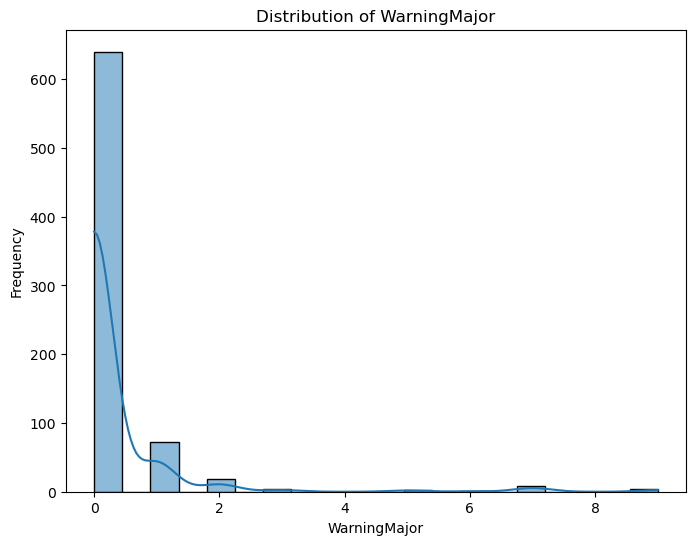

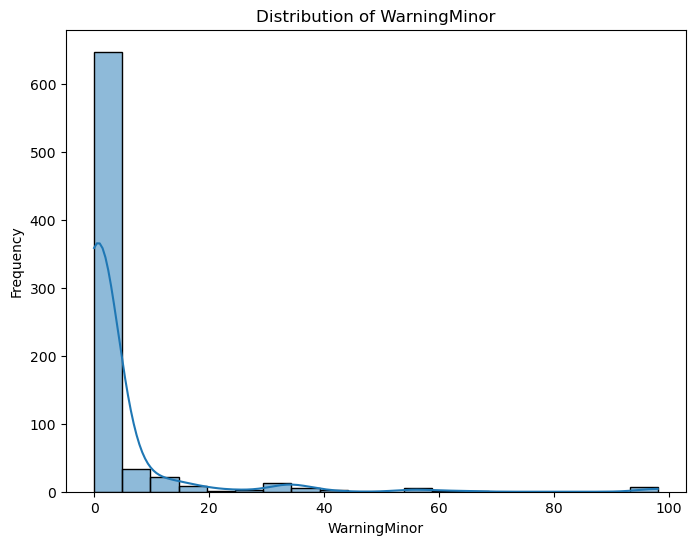

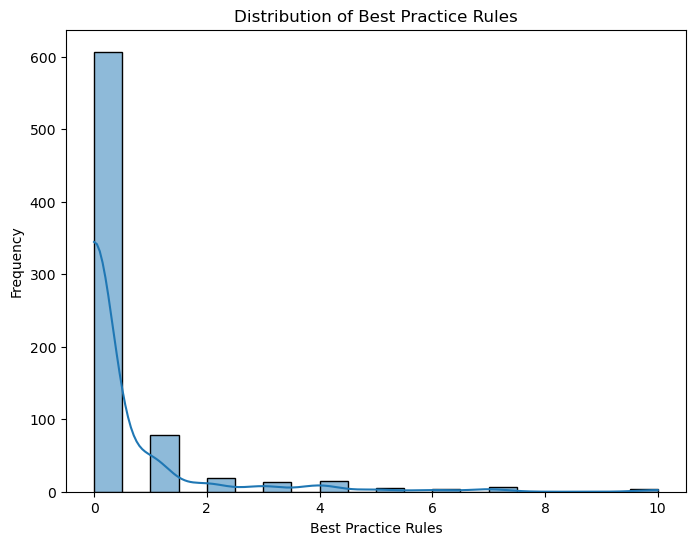

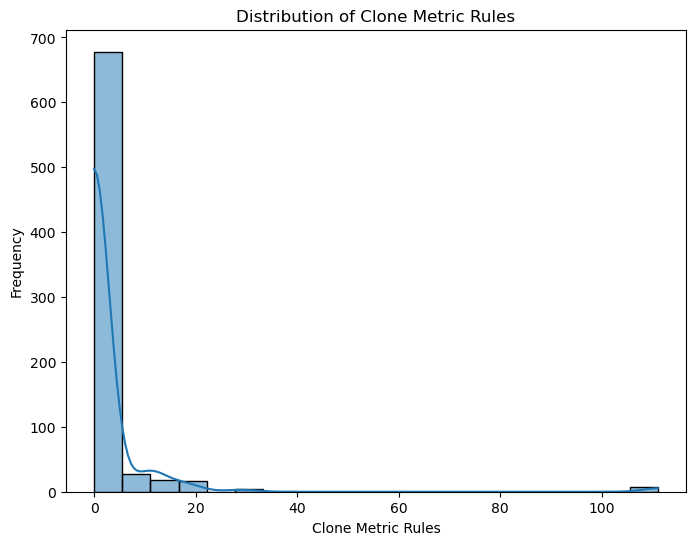

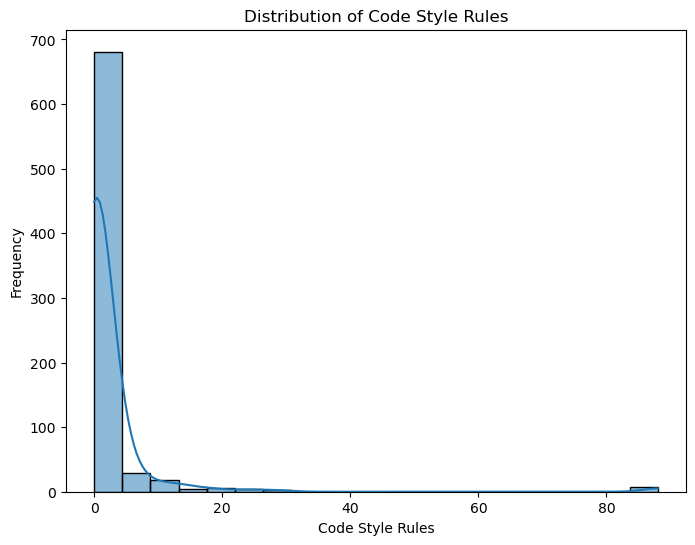

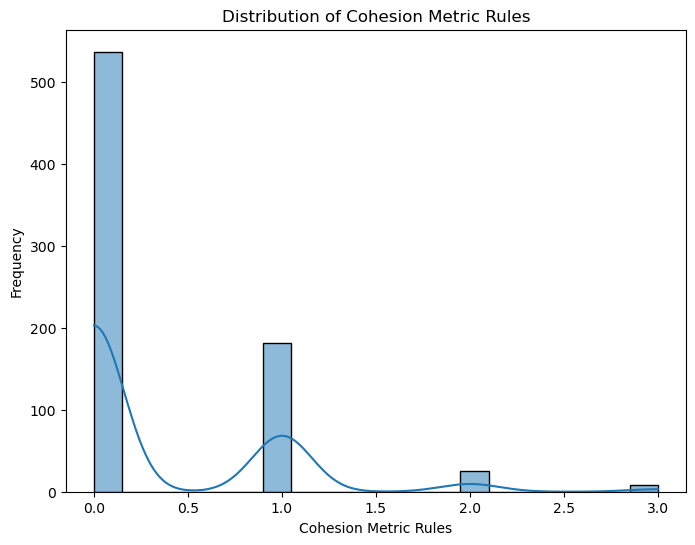

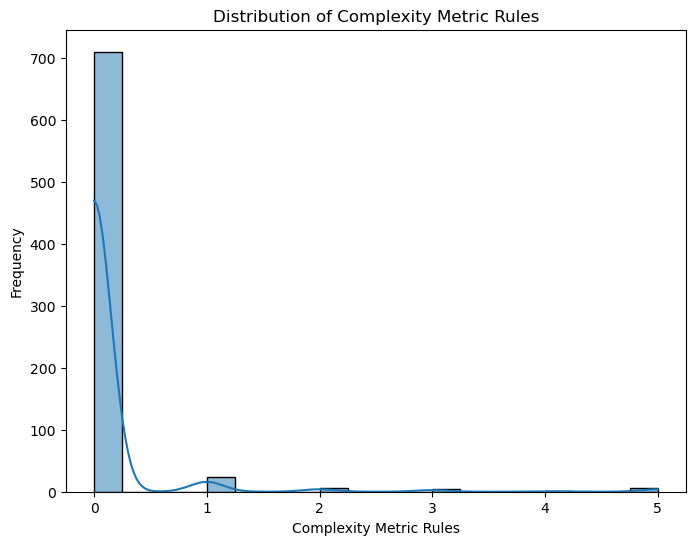

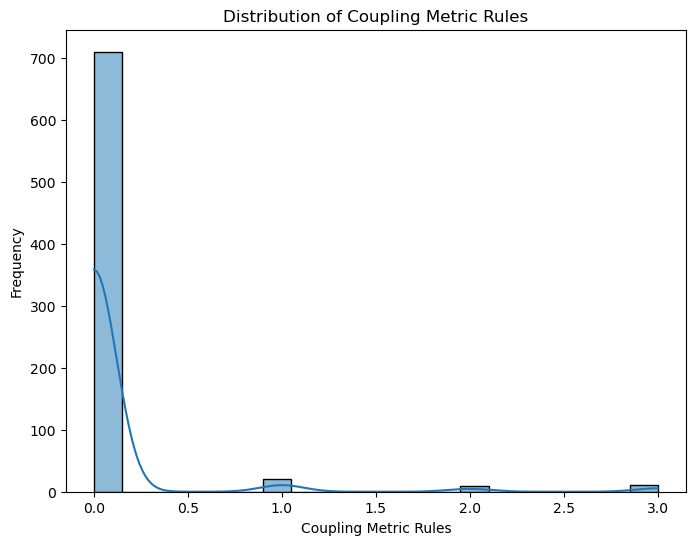

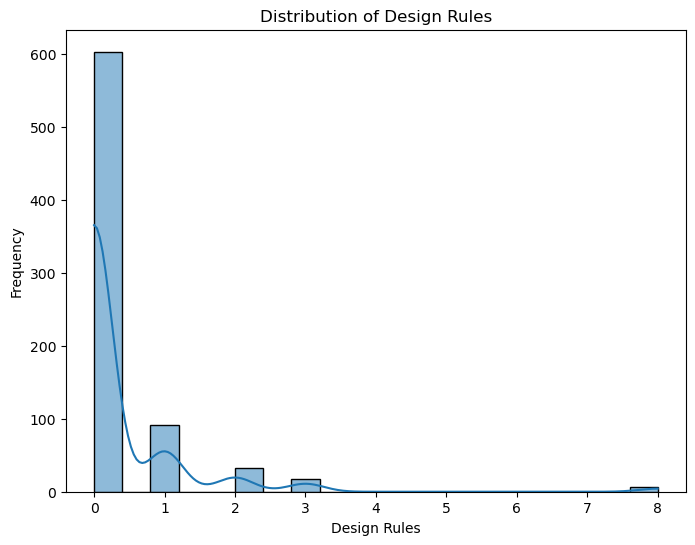

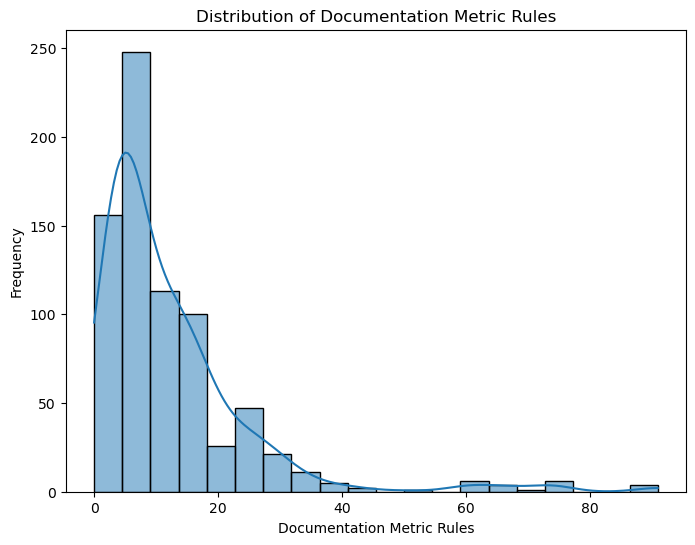

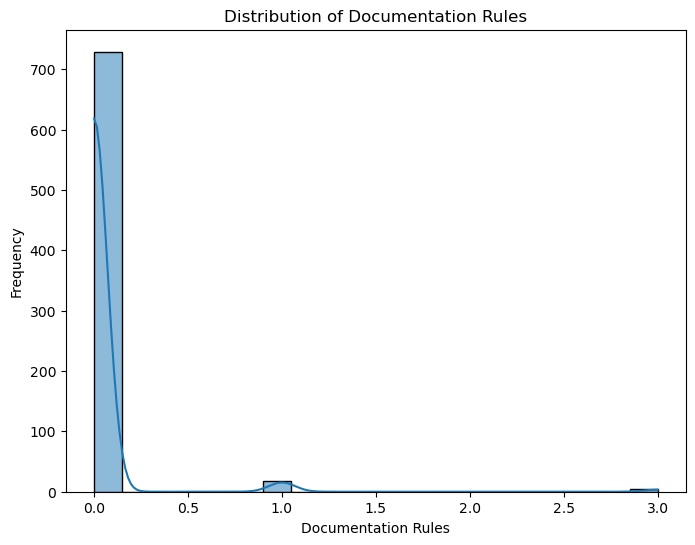

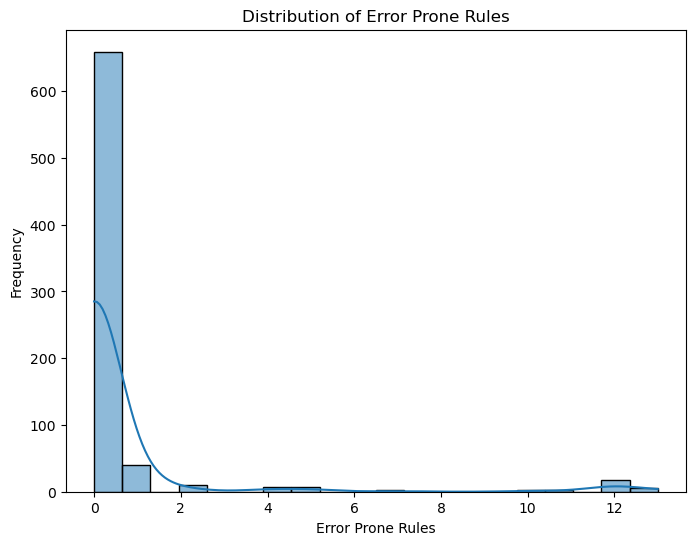

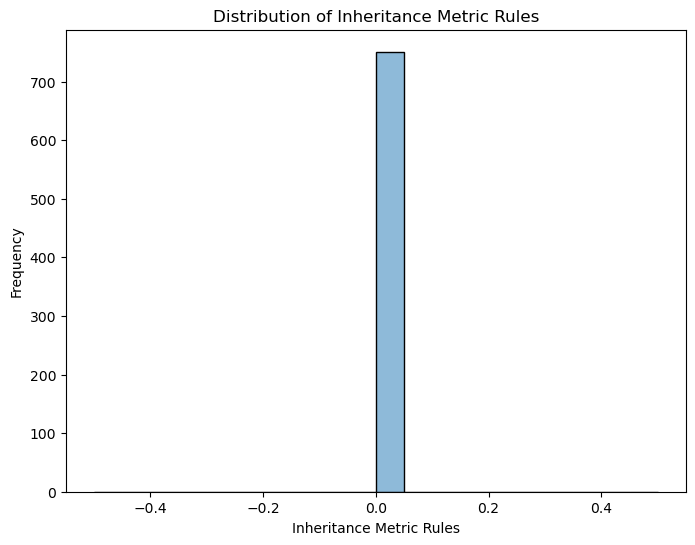

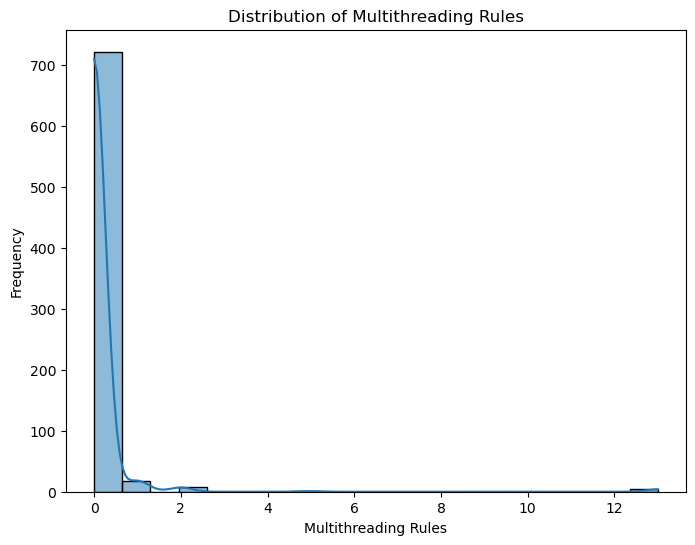

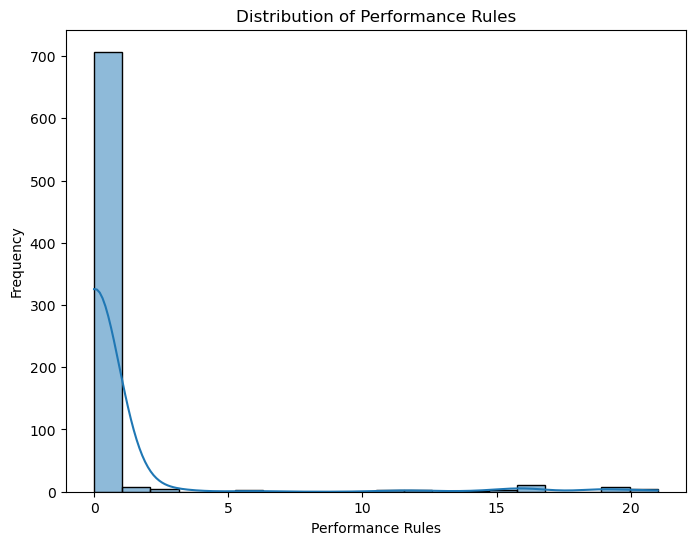

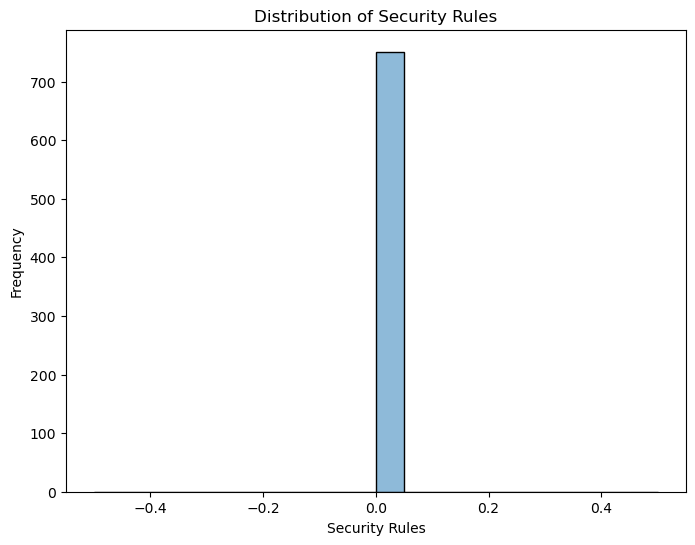

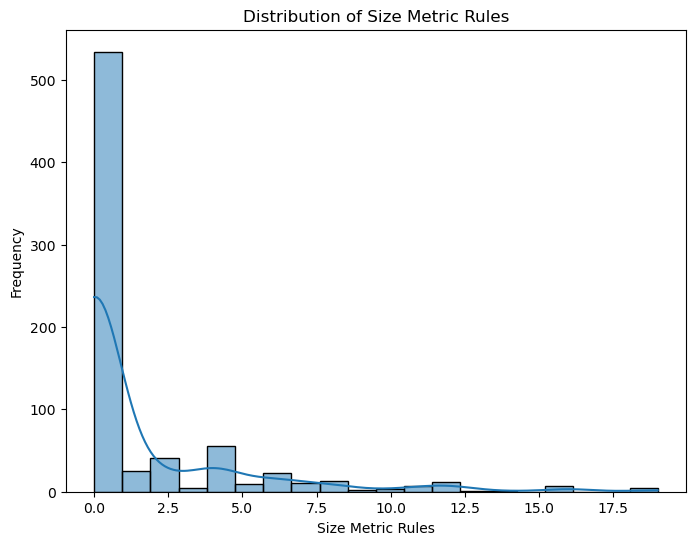

In [6]:
#Part 5: Visualize the Distribution of Numerical Features

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each numerical feature
for column in X:
    plt.figure(figsize=(8, 6))
    sns.histplot(X[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


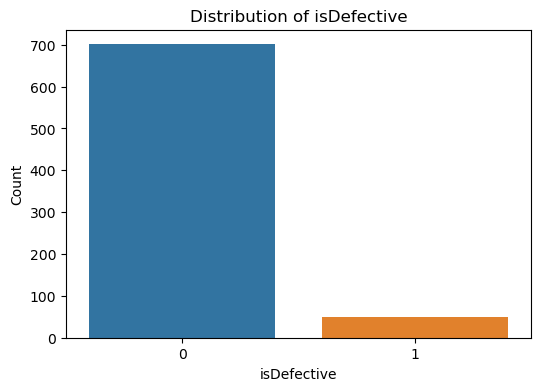

In [7]:
# Distribution of 'isDefective'
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of isDefective')
plt.xlabel('isDefective')
plt.ylabel('Count')
plt.show()


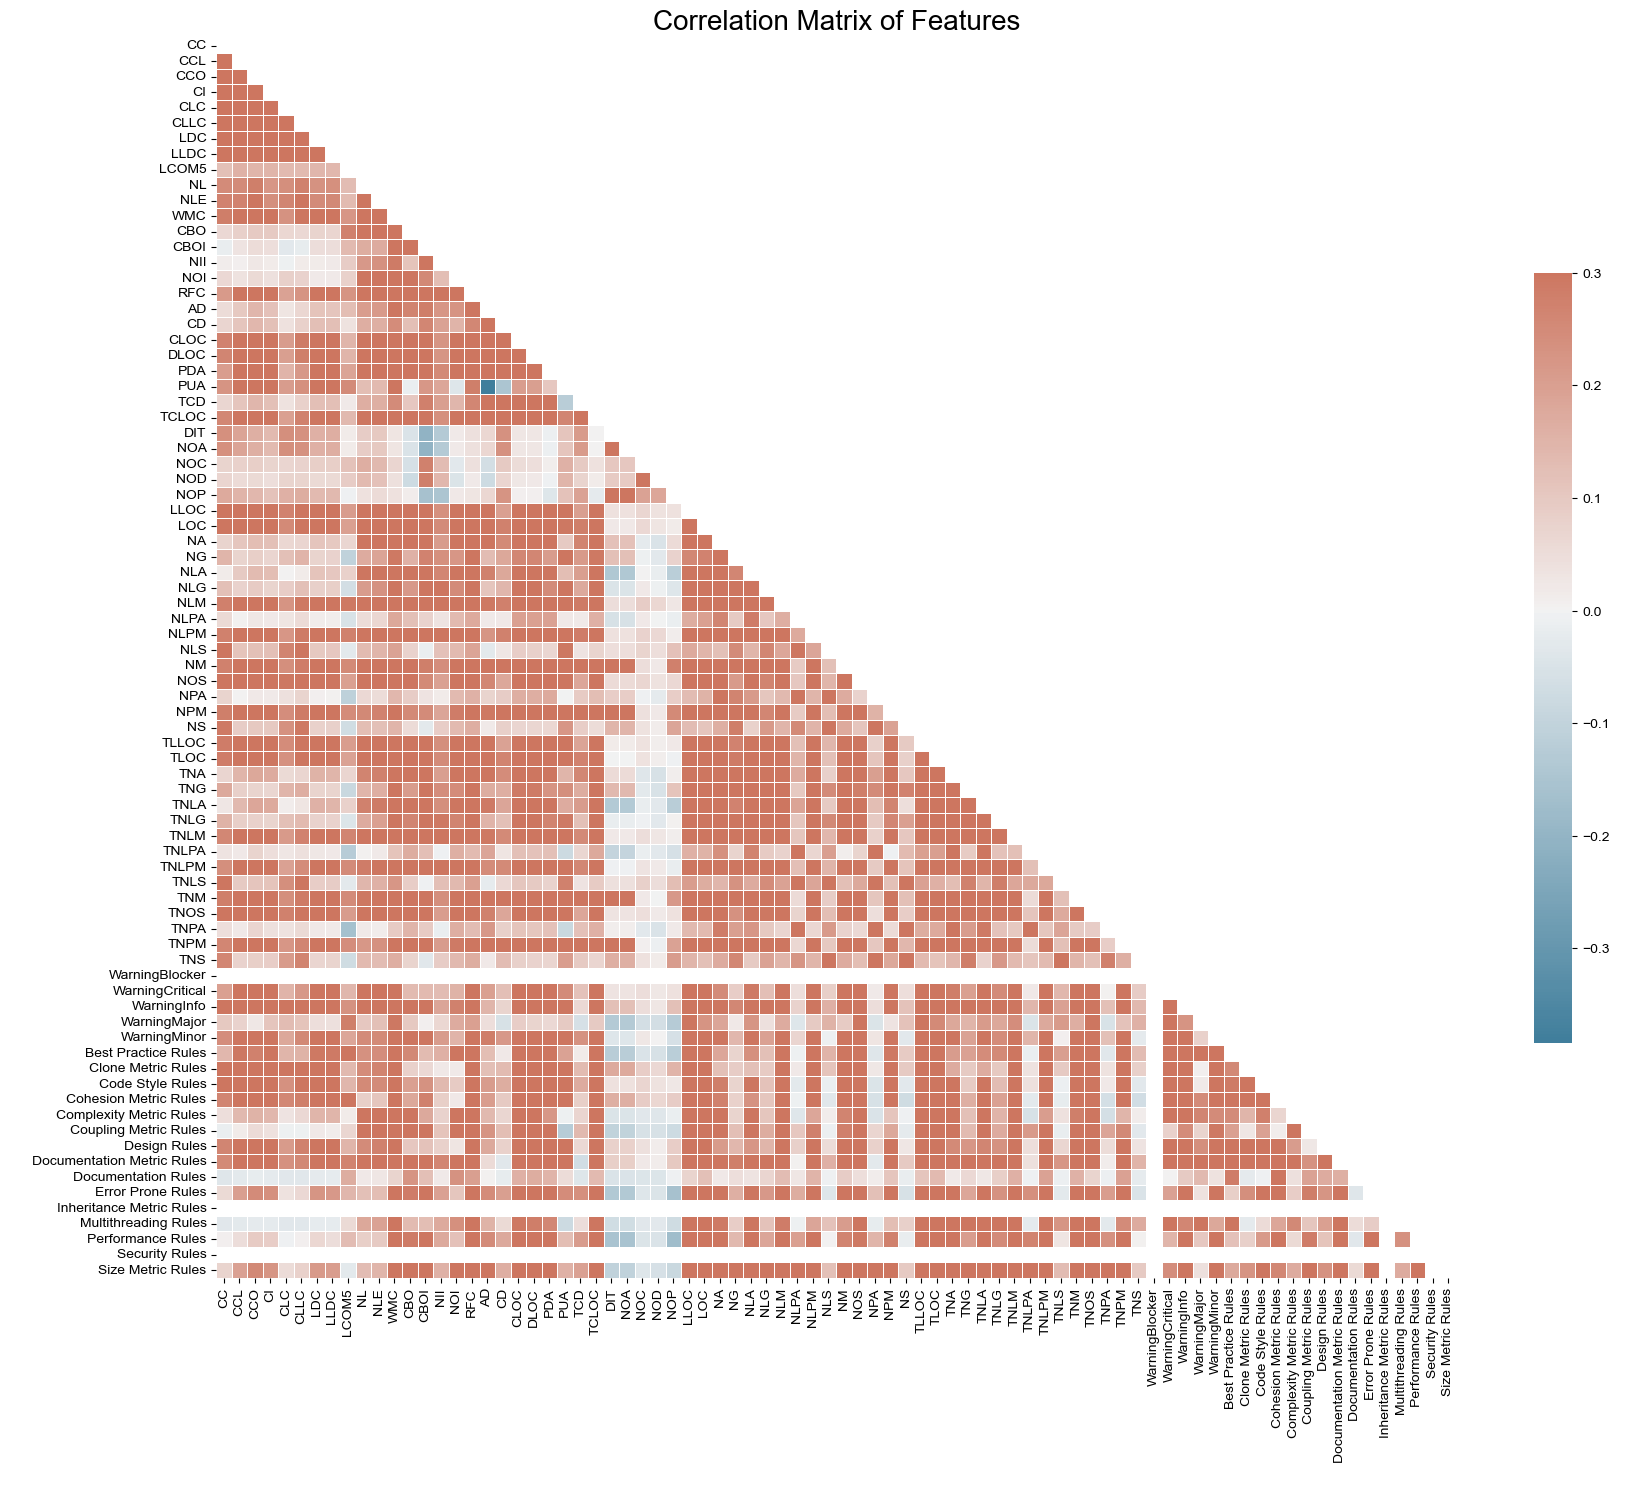

In [10]:
import numpy as np  # Required for np.triu and np.ones_like
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  X_scaled and X.columns are defined from earlier in your code
# If they're not, you will need to define them before this code

plt.figure(figsize=(20, 20))  # Increase the size of the plot

# Calculate the correlation matrix
corr_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose a diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

# Rotate the labels on the y-axis
plt.yticks(rotation=0)

# Rotate the labels on the x-axis
plt.xticks(rotation=90)

# Use a larger font size for the labels to improve readability
sns.set(font_scale=1.25)

plt.title('Correlation Matrix of Features', fontsize=20)
plt.show()


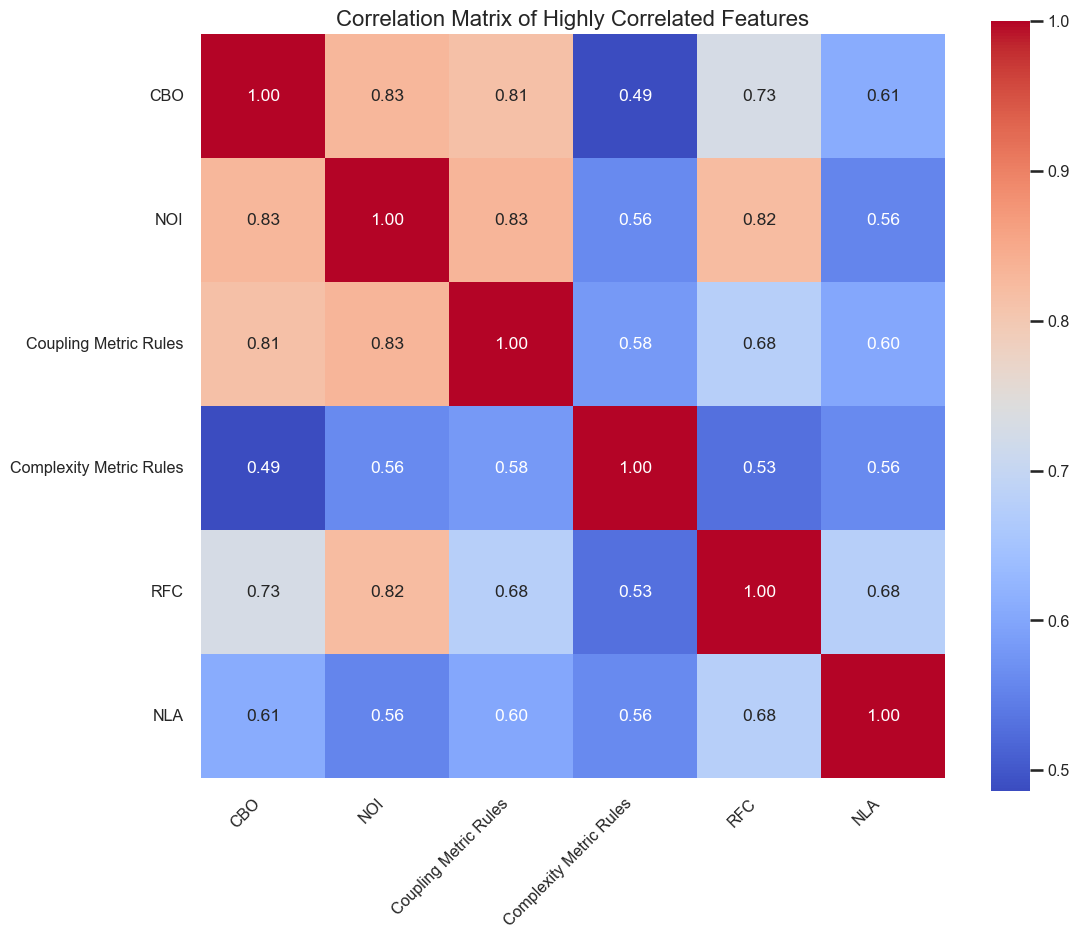

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  ml_df is our DataFrame after preprocessing and 'isDefective' is the target

# Calculate the correlation with the target variable
correlation_with_target = ml_df.corrwith(ml_df['isDefective']).sort_values(ascending=False)

# Filter out the target variable correlation (which is 1 with itself)
correlation_with_target = correlation_with_target[correlation_with_target.index != 'isDefective']

# Select features with high correlation with the target variable
# Adjust the threshold value as per your requirements
threshold = 0.2
high_corr_features = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()

# If there are highly correlated features, plot the correlation matrix
if high_corr_features:
    # Calculate the correlation matrix for the selected features
    high_corr_matrix = ml_df[high_corr_features].corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))  # Adjust figure size as needed

    # Draw the heatmap
    sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

    # Rotate the labels on the x-axis and set font size
    plt.xticks(rotation=45, ha='right')

    # Rotate the labels on the y-axis and set font size
    plt.yticks(rotation=0)

    # Set a title and increase the title size
    plt.title('Correlation Matrix of Highly Correlated Features', fontsize=16)

    plt.show()
else:
    print("No features found with a correlation above the threshold of", threshold)


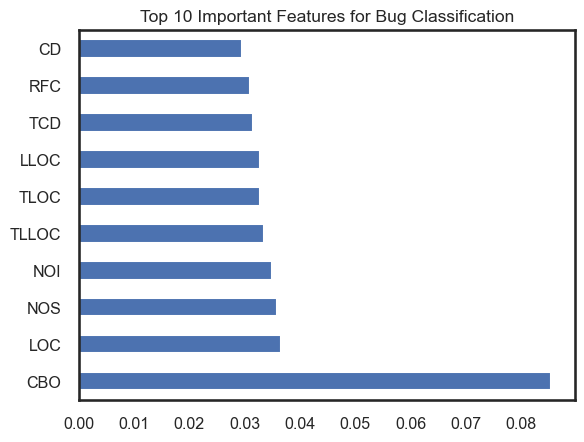

In [49]:
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features for Bug Classification')
plt.show()


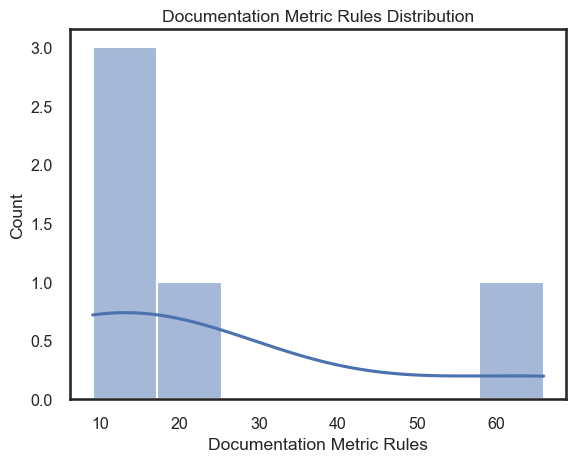

In [37]:
sns.histplot(combined_df['Documentation Metric Rules'], kde=True)
plt.title('Documentation Metric Rules Distribution')
plt.show()


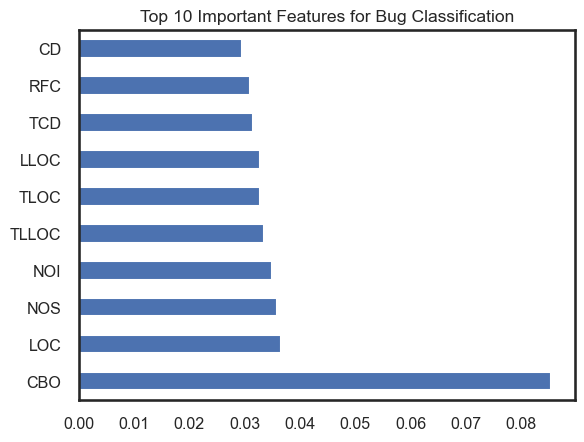

In [48]:
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features for Bug Classification')
plt.show()


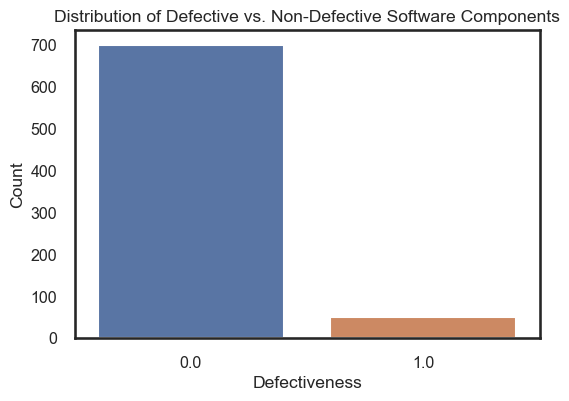

C:\Users\dell\AppData\Local\Temp\ipykernel_21716\2849223389.py:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_df.corr()


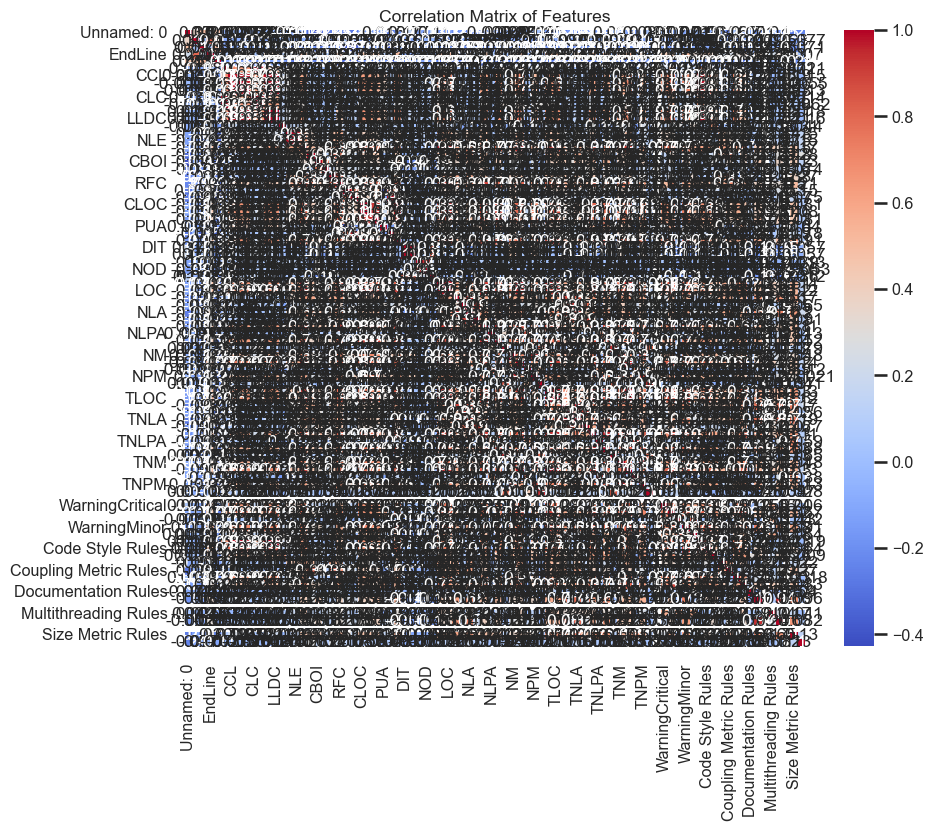

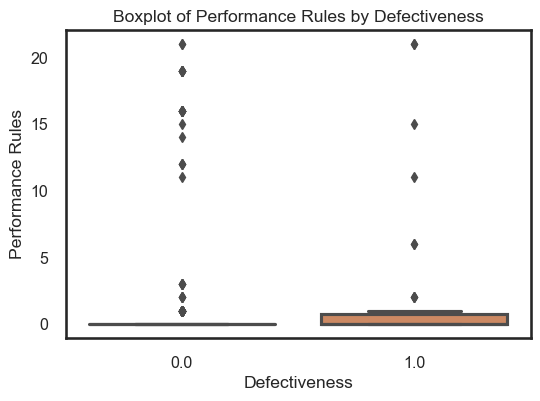

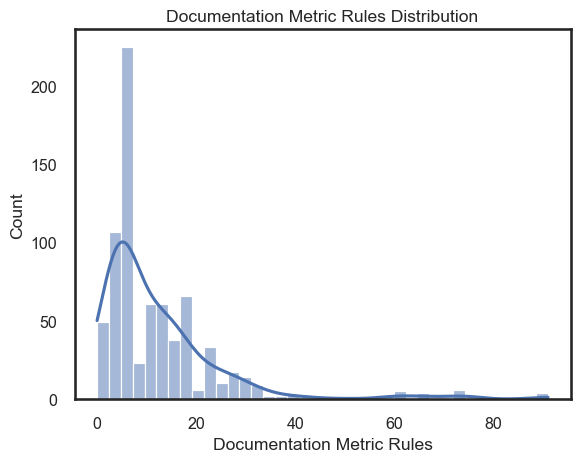

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Combine datasets from multiple CSV files into a single DataFrame
file_paths = [
    'data/dataset-7dd735871fec70d4a93837a26503470804b7d7e4.csv',
    'data/dataset-9da1b1ad1dd61b8df1571d7b6dc1308f19d5d40d.csv',
    'data/dataset-48d5c652044686720d8e17421980d179e9113c0b.csv',
    'data/dataset-74c53a807310decb44797677d41e964e288970ed.csv',
    'data/dataset-6178836980e47d9813165051b4b8527fff8e1b58.csv',
    'data/dataset-d619c5f915e566df1af75b7bed95b90b5926a4aa.csv',
    'data/dataset-d056482f7a9bf840a1bab0fef0be27ba05aa702c.csv'
]


dfs = [pd.read_csv(file_path) for file_path in file_paths]
combined_df = pd.concat(dfs, ignore_index=True)

combined_df = combined_df.drop_duplicates()

# Step 2: Perform Exploratory Data Analysis (EDA)

# 2.1 Distribution of the Target Variable ('isDefective')
plt.figure(figsize=(6, 4))
sns.countplot(x='isDefective', data=combined_df)
plt.title('Distribution of Defective vs. Non-Defective Software Components')
plt.xlabel('Defectiveness')
plt.ylabel('Count')
plt.show()

# 2.2 Correlation Matrix of Features
correlation_matrix = combined_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# 2.3 Boxplot for 'Performance Rules' by 'isDefective'
plt.figure(figsize=(6, 4))
sns.boxplot(x='isDefective', y='Performance Rules', data=combined_df)
plt.title('Boxplot of Performance Rules by Defectiveness')
plt.xlabel('Defectiveness')
plt.ylabel('Performance Rules')
plt.show()

sns.histplot(combined_df['Documentation Metric Rules'], kde=True)
plt.title('Documentation Metric Rules Distribution')
plt.show()

